# Localized Exploratory Analysis

This exploratory analysis was done with the purpose of understanding the behavior of the meteorological variables with the Dengue variables in a specific municipality. It is worth noting that the files read in this notebook have already been preprocessed. And this notebook is designed to receive any municipality and run the analysis for the given municipality without much change to the code.

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_style("ticks")
import pandas as pd
from datetime import datetime
import glob
import os
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams.update({'font.size': 12})

In [ ]:
df = pd.read_csv("local/data/medellin_consolidado_2012_2020.csv", index_col = 0, parse_dates= True)

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In [ ]:
municipality = "Barranquilla"

In [ ]:
def plot_time_series(dates_array, values_array,  labels, colors, title, x_label, y_label, kind = "lineplot", fulldates = False):
    """
    Function to plot time series: 
    
    dates: must be an array of datetime series for the x axis
    values: the array of y axis values to plot
    labels: the array of labels for each plot
    title: string that goes above the plot
    x_label: string that goes on the x-axis
    y_label: string that goes on the y-axis
    kind: the type of the graph
    fulldates: if the plot is going to receive full dates or just numbers.
    """
    years_locator = mdates.YearLocator()
    months_locator = mdates.MonthLocator()
    years_format = mdates.DateFormatter('%Y')
    sns.set_style('ticks')
    fig, ax = plt.subplots(1,1, figsize=(12,5), dpi = 150)

    ax.ticklabel_format(axis='y', style='plain')
    if fulldates:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_locator(years_locator)
        ax.xaxis.set_major_formatter(years_format)
        ax.xaxis.set_minor_locator(months_locator)
    
    for i in range(len(dates_array)):
        if kind == "lineplot":
            sns.lineplot(x=dates_array[i], y=values_array[i],  label = labels_array[i], color = colors[i], ax = ax)

    rotation = 45
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    plt.xlabel(x_label, fontsize='16')
    plt.ylabel(y_label, fontsize='16')
    plt.title(title, fontsize='18')

    plt.show()

# TEMPERATURE PLOTS

The temperature variable must always looked at in 3 different forms, the maximum, minimum and mean temperature. 

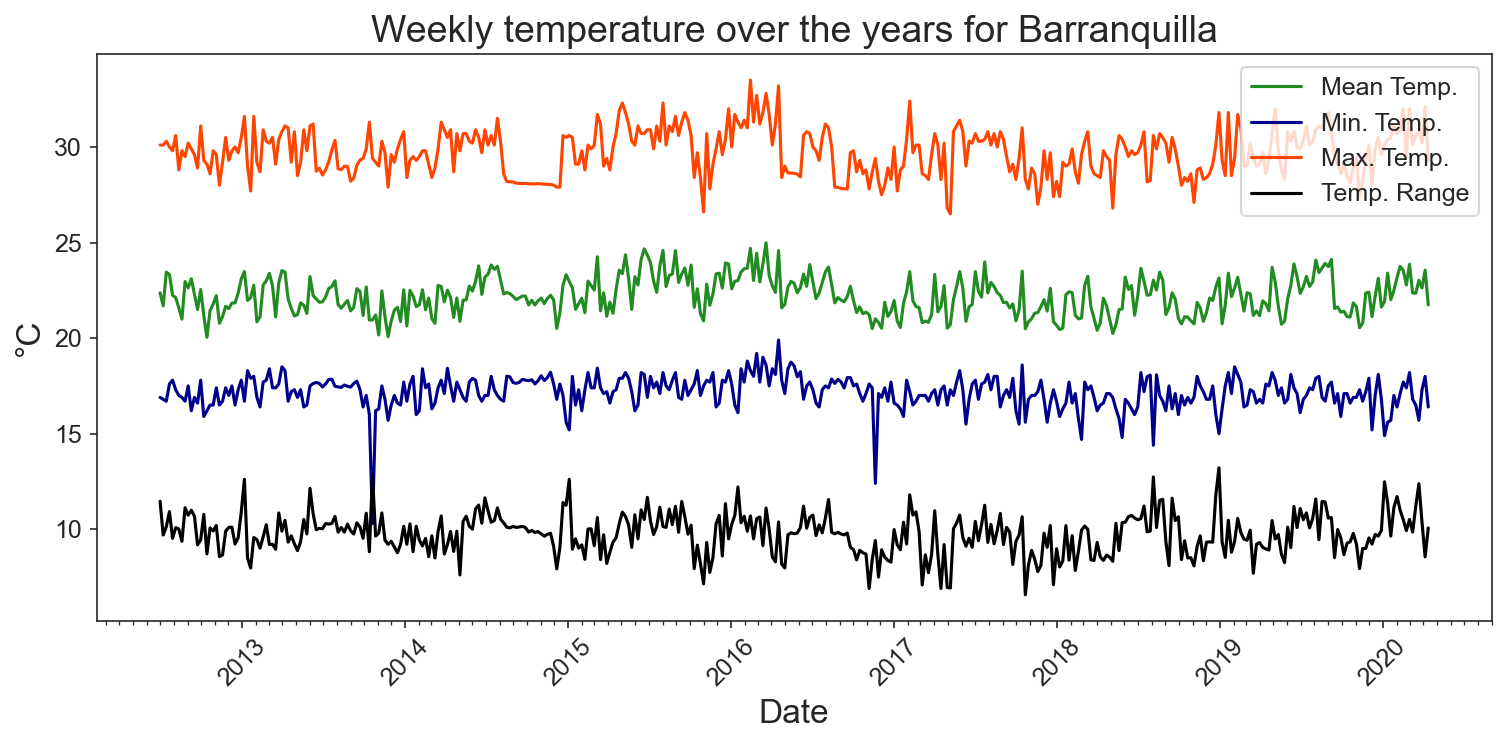

In [ ]:
x_array = [df.index]*4
y_array = [df["TEMPERATURE_MEAN"], df["TEMPERATURE_AMIN"],df["TEMPERATURE_AMAX"] , df["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Weekly temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

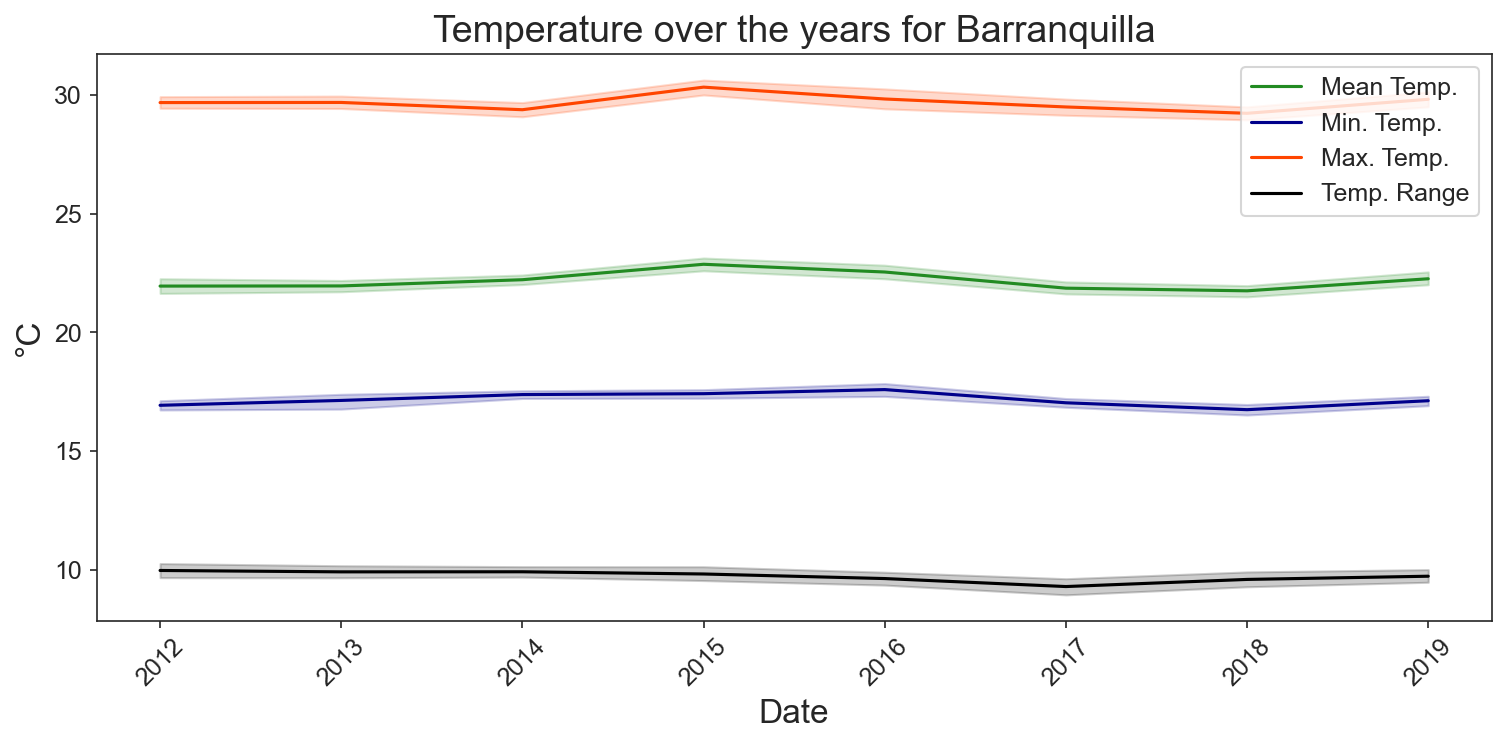

In [ ]:
df_filt = df[(df["ANO"]>=2007) & (df["ANO"]<=2019)]
x_array = [df_filt["ANO"]]*4
y_array = [df_filt["TEMPERATURE_MEAN"], df_filt["TEMPERATURE_AMIN"],df_filt["TEMPERATURE_AMAX"] , df_filt["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot")

Text(0.5, 0, 'Month')

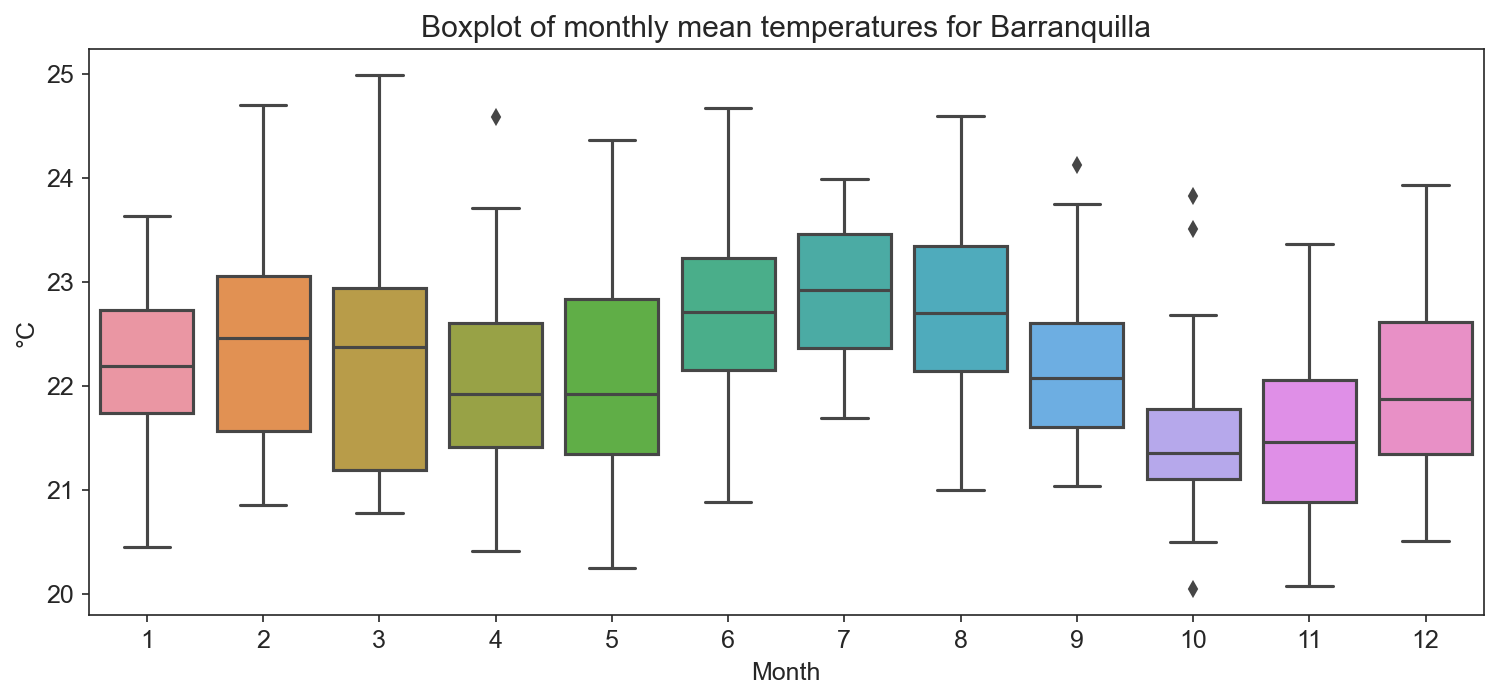

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["TEMPERATURE_MEAN"])
axes.set_title("Boxplot of monthly mean temperatures for " + municipality)
axes.set_ylabel("°C")
axes.set_xlabel("Month")

# HUMIDITY PLOTS

The humidity variable must always looked at in 3 different forms, the maximum, minimum and mean humidity. 

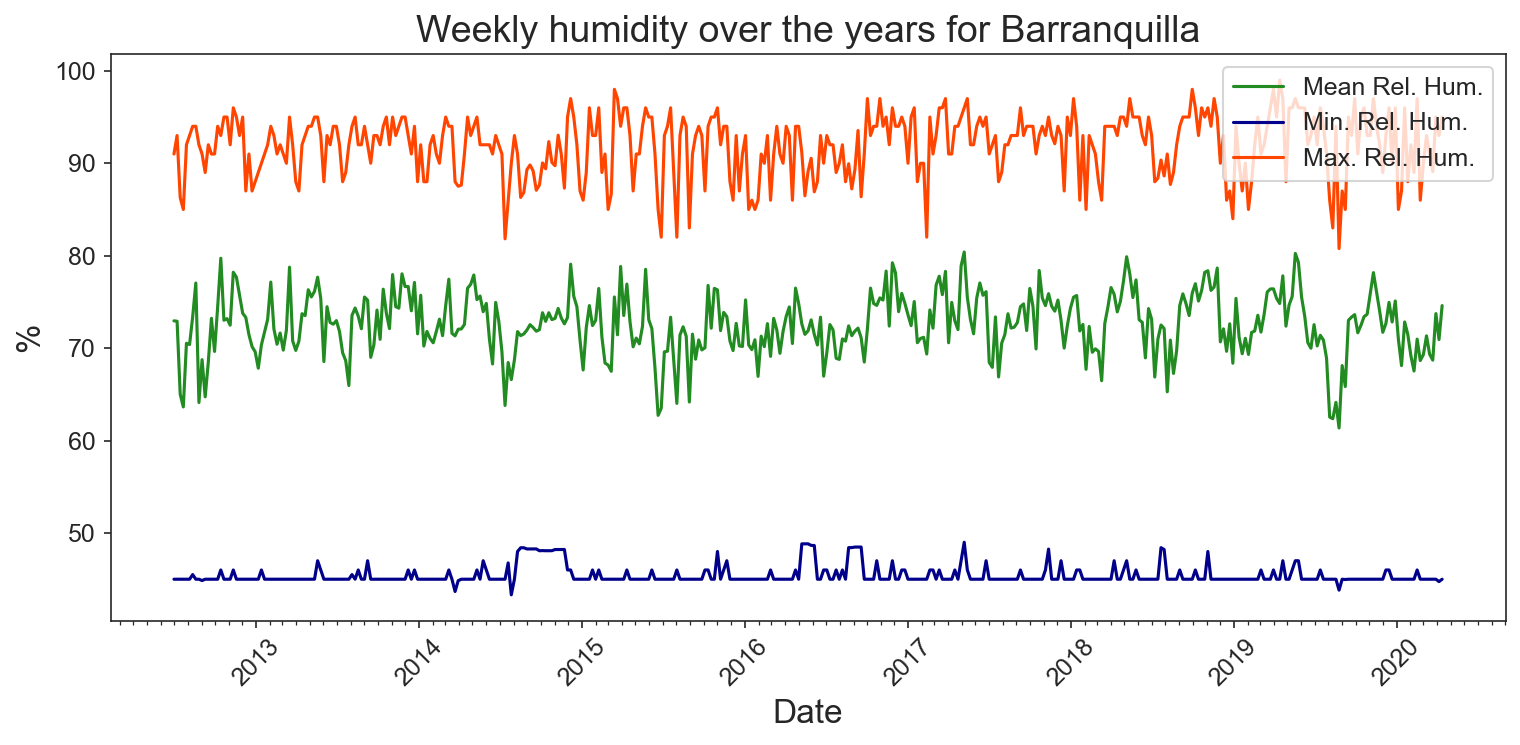

In [ ]:
x_array = [df.index]*3
y_array = [df["REL_HUMIDITY_MEAN"], df["REL_HUMIDITY_AMIN"],df["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Weekly humidity over the years for " + municipality
colors = ["forestgreen","darkblue","orangered"]
ylabel = "%"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

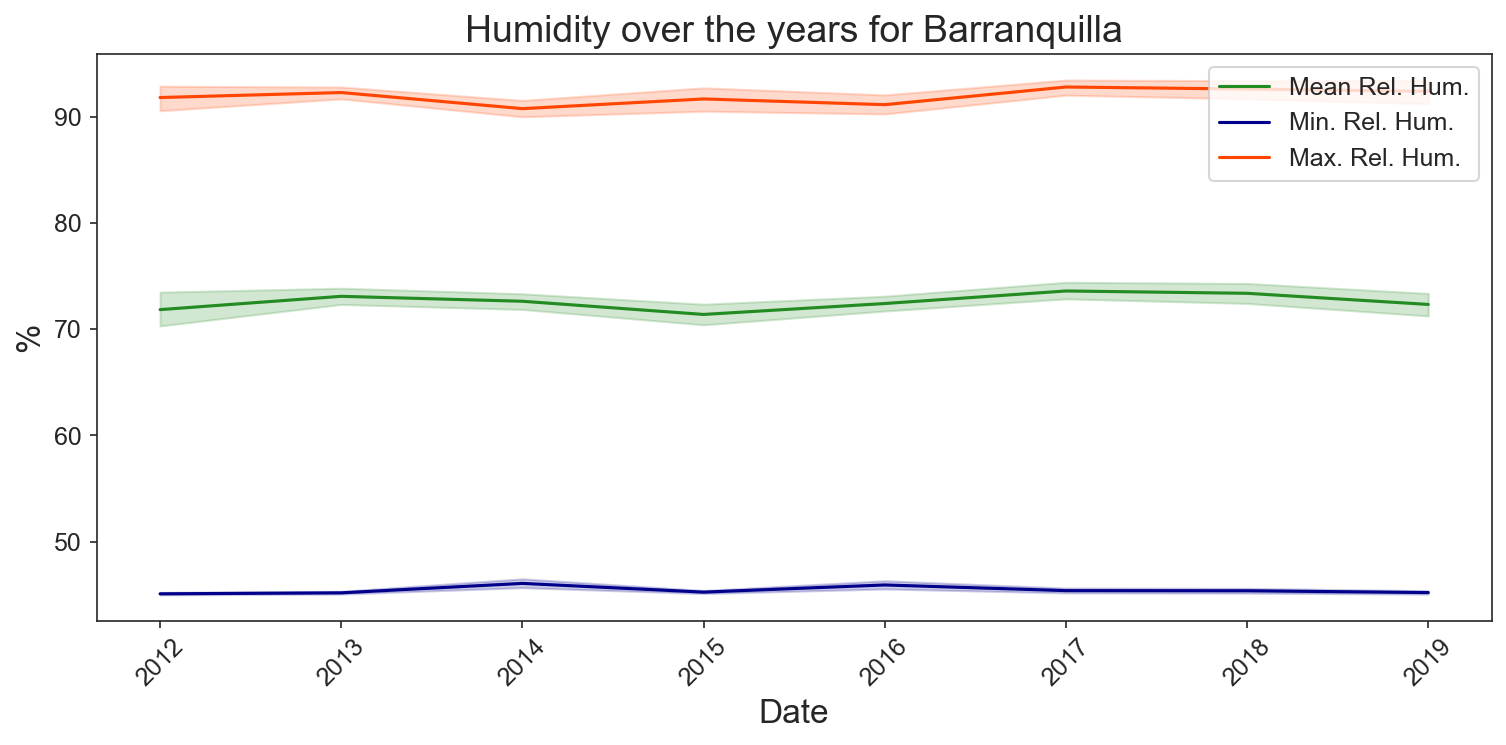

In [ ]:
x_array = [df_filt["ANO"]]*3
y_array = [df_filt["REL_HUMIDITY_MEAN"], df_filt["REL_HUMIDITY_AMIN"],df_filt["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Humidity over the years for " + municipality
ylabel = "%"
xlabel = "Date"
colors = ["forestgreen","darkblue","orangered"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

Text(0.5, 0, 'Month')

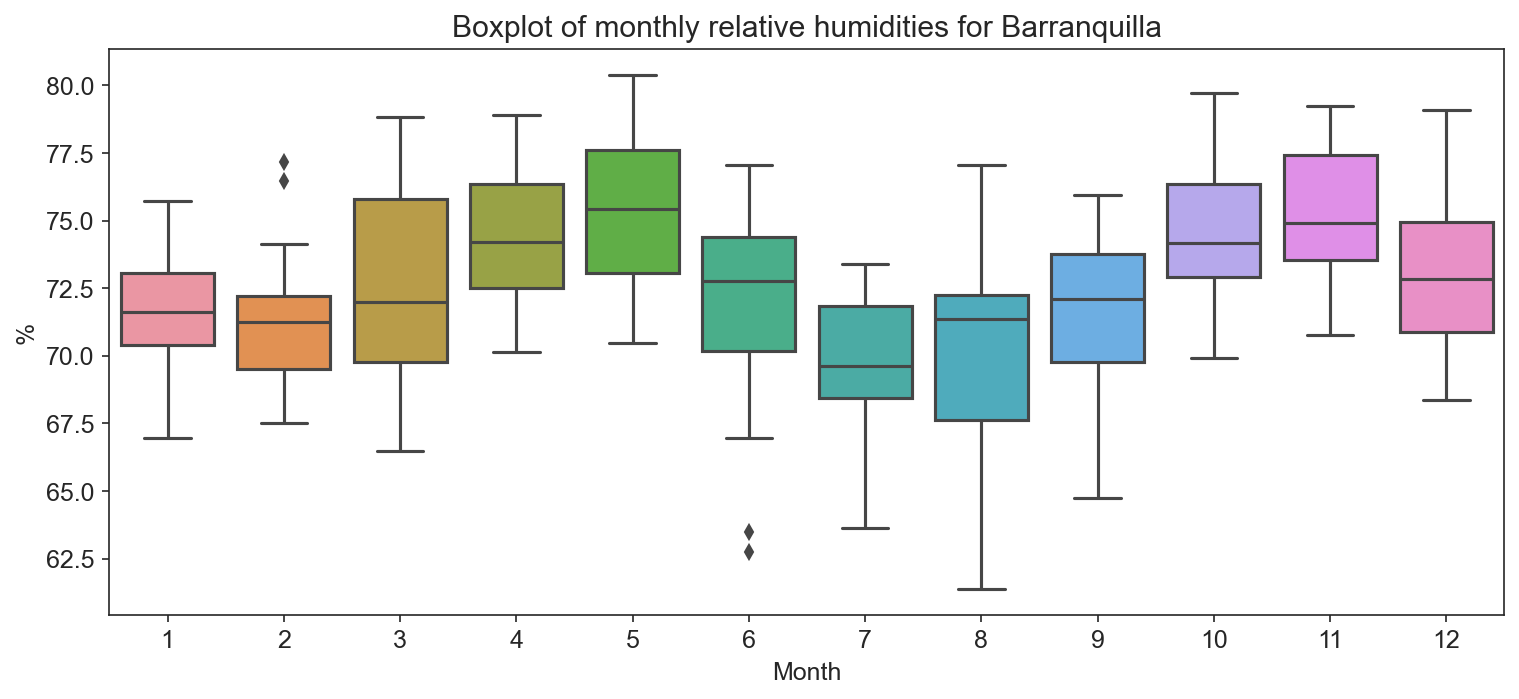

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["REL_HUMIDITY_MEAN"])
axes.set_title("Boxplot of monthly relative humidities for " + municipality)
axes.set_ylabel("%")
axes.set_xlabel("Month")

# PRECIPITATION PLOTS

The precipitation variable, due to its nature, must be analyzed as the total precipitation. The maximum and minimums in this variable do not describe the general behavior of the variable.

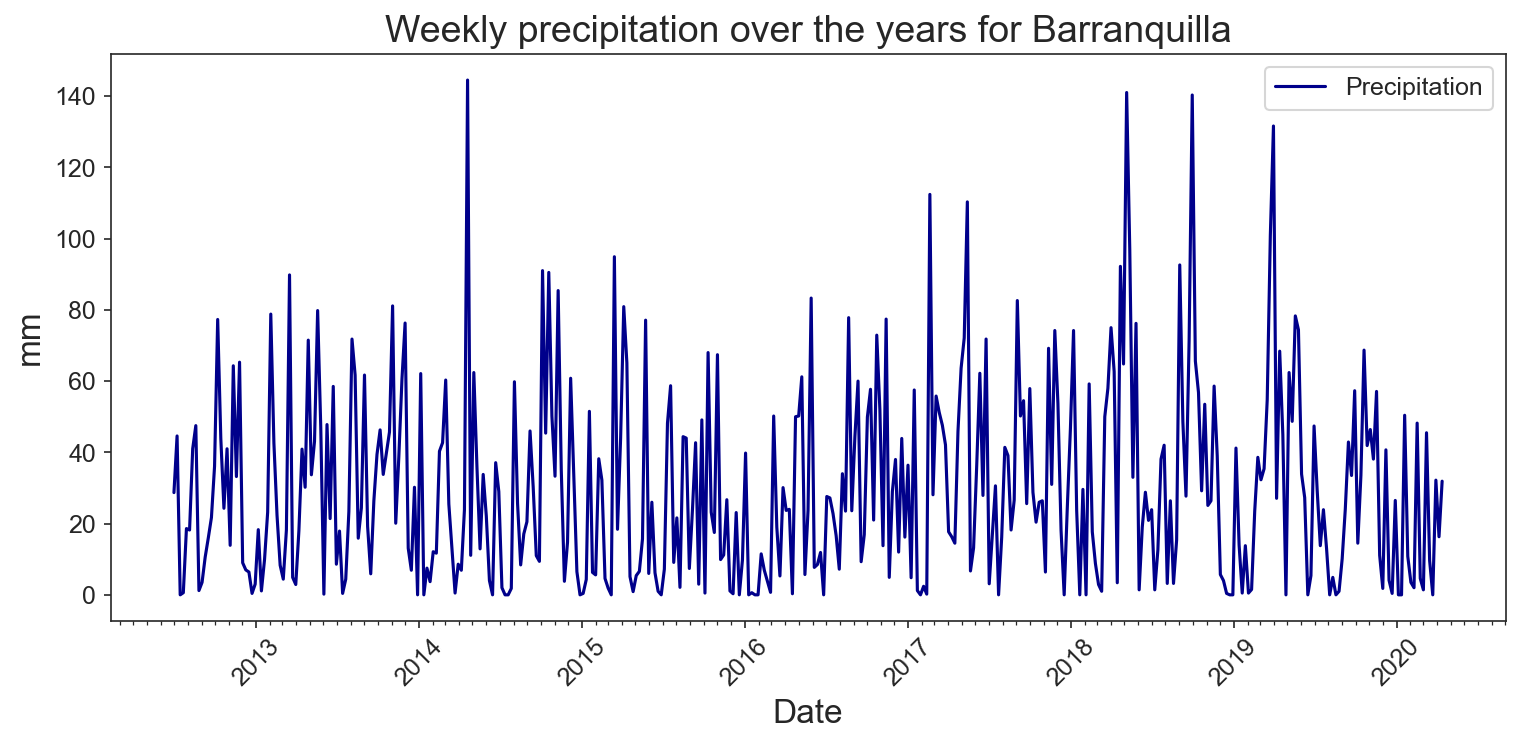

In [ ]:
x_array = [df.index]
y_array = [df["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Weekly precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Date"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

Text(0.5, 0, 'Month')

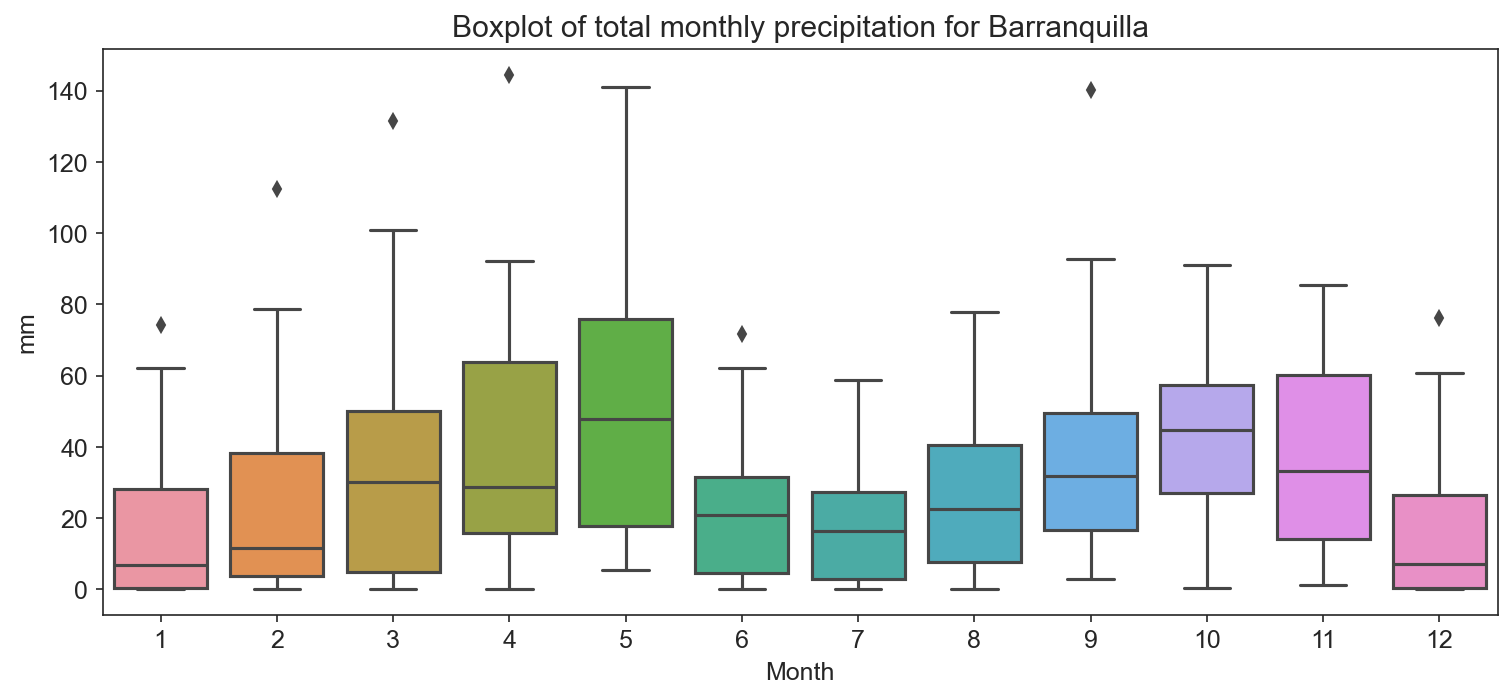

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["PRECIPITATION"])
axes.set_title("Boxplot of total monthly precipitation for " + municipality)
axes.set_ylabel("mm")
axes.set_xlabel("Month")

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

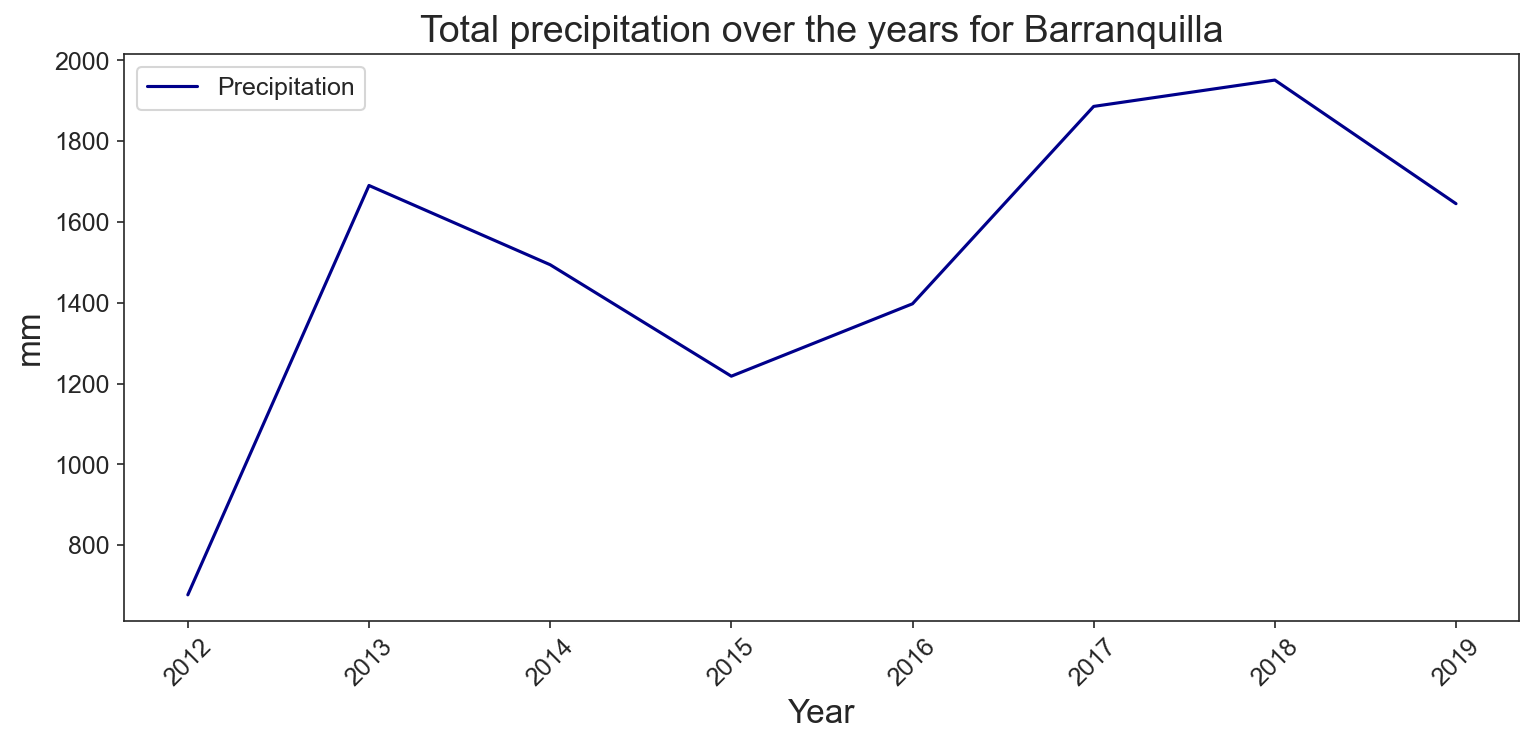

In [ ]:
df_prec_yearly = df[(df.index.year >= 2007) & (df.index.year <= 2019)]
df_prec_yearly = df_prec_yearly[["PRECIPITATION","DRY_DAYS"]]
df_prec_yearly = df_prec_yearly.groupby(df_prec_yearly.index.year).sum()
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Total precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Year"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title, xlabel,ylabel, "lineplot", fulldates = False)

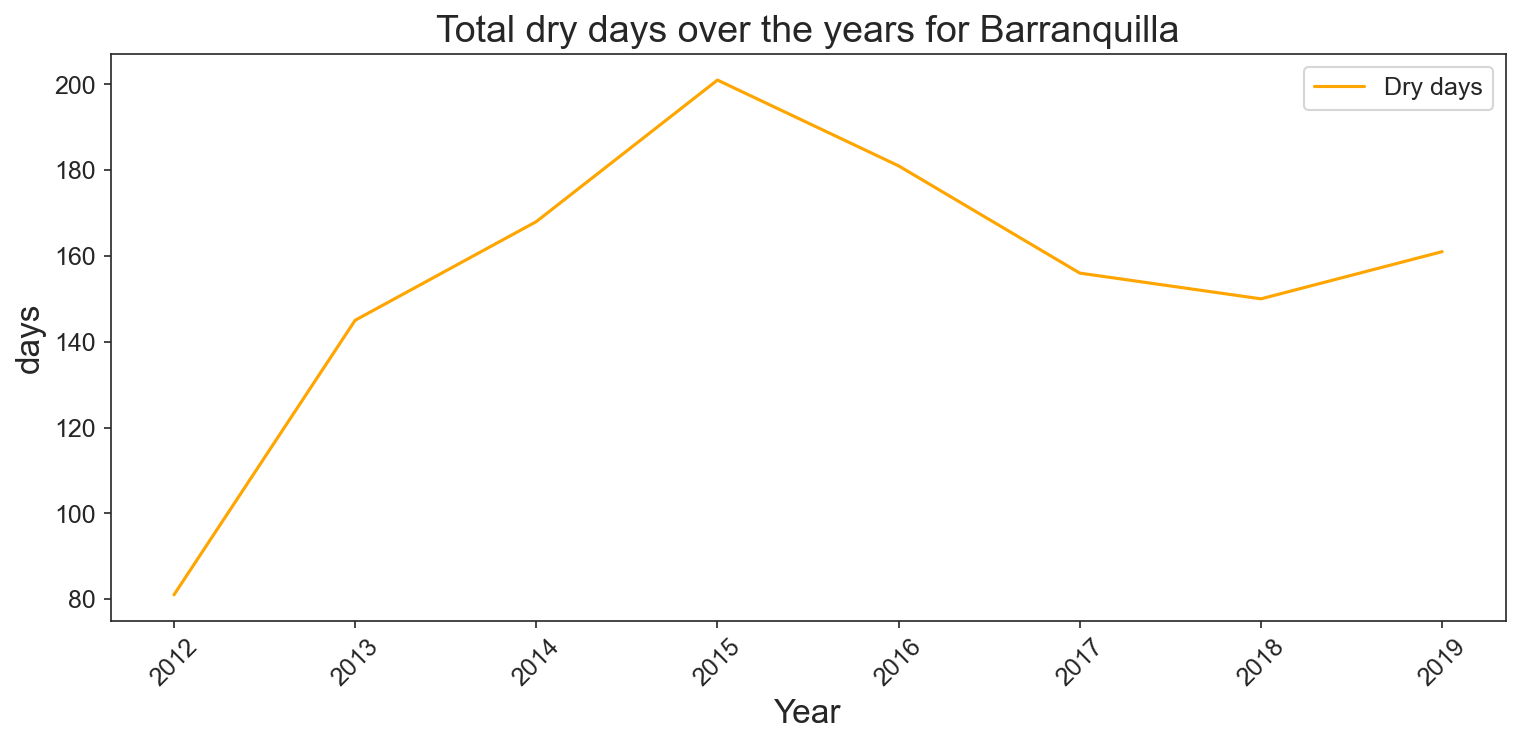

In [ ]:
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["DRY_DAYS"]]
labels_array = ["Dry days"]
title = "Total dry days over the years for " + municipality
ylabel = "days"
xlabel = "Year"
colors = ["orange"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

# NIÑO PLOTS

The Niño indexes are also very important features to analyze in this project. That is why it is interesting to analyze and understand their behavior in time series plots.

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

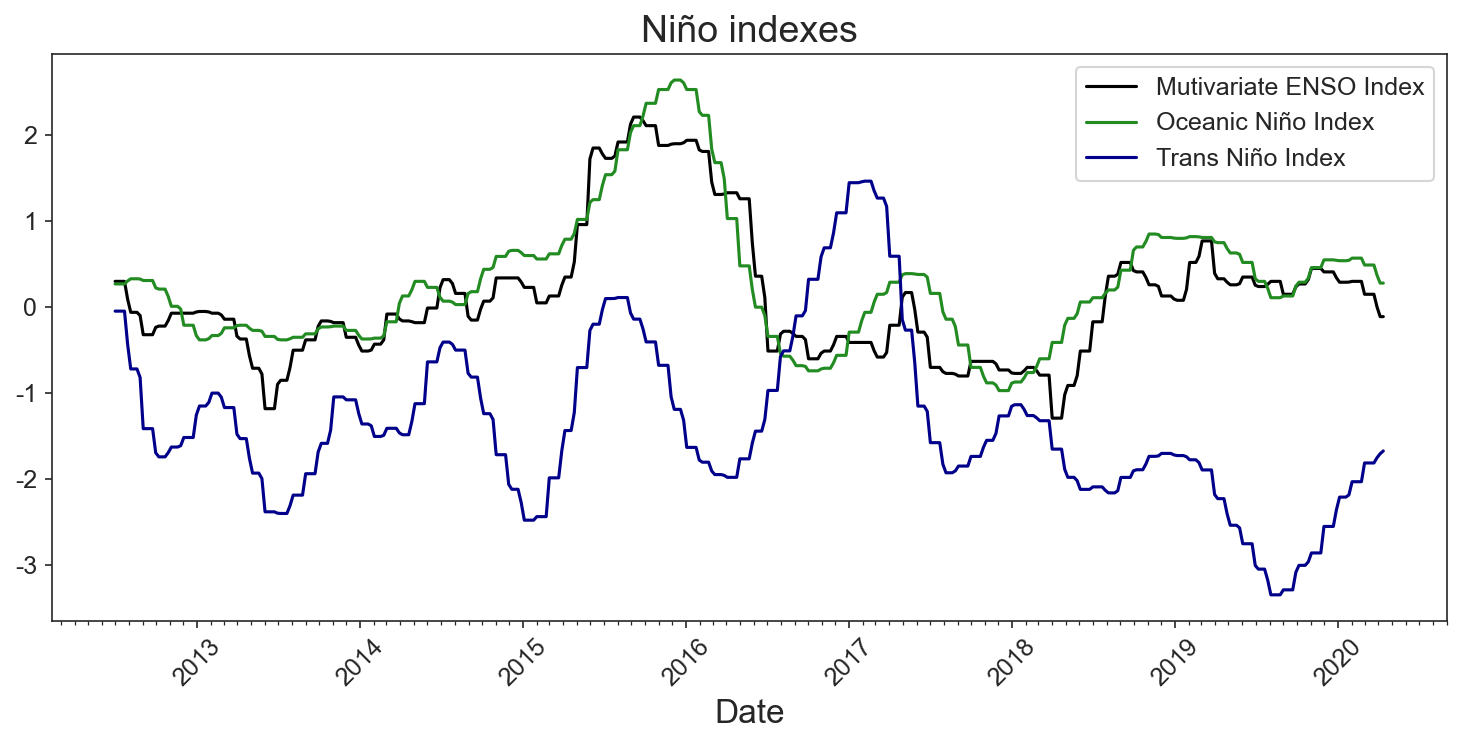

In [ ]:
x_array = [df.index]*3
y_array = [df["MEI"], df["ONI"], df["TNI"]]
labels_array = ["Mutivariate ENSO Index", "Oceanic Niño Index", "Trans Niño Index"]
colors = ["black","forestgreen","darkblue","orangered","cyan","black"]
title = "Niño indexes"
ylabel = ""
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

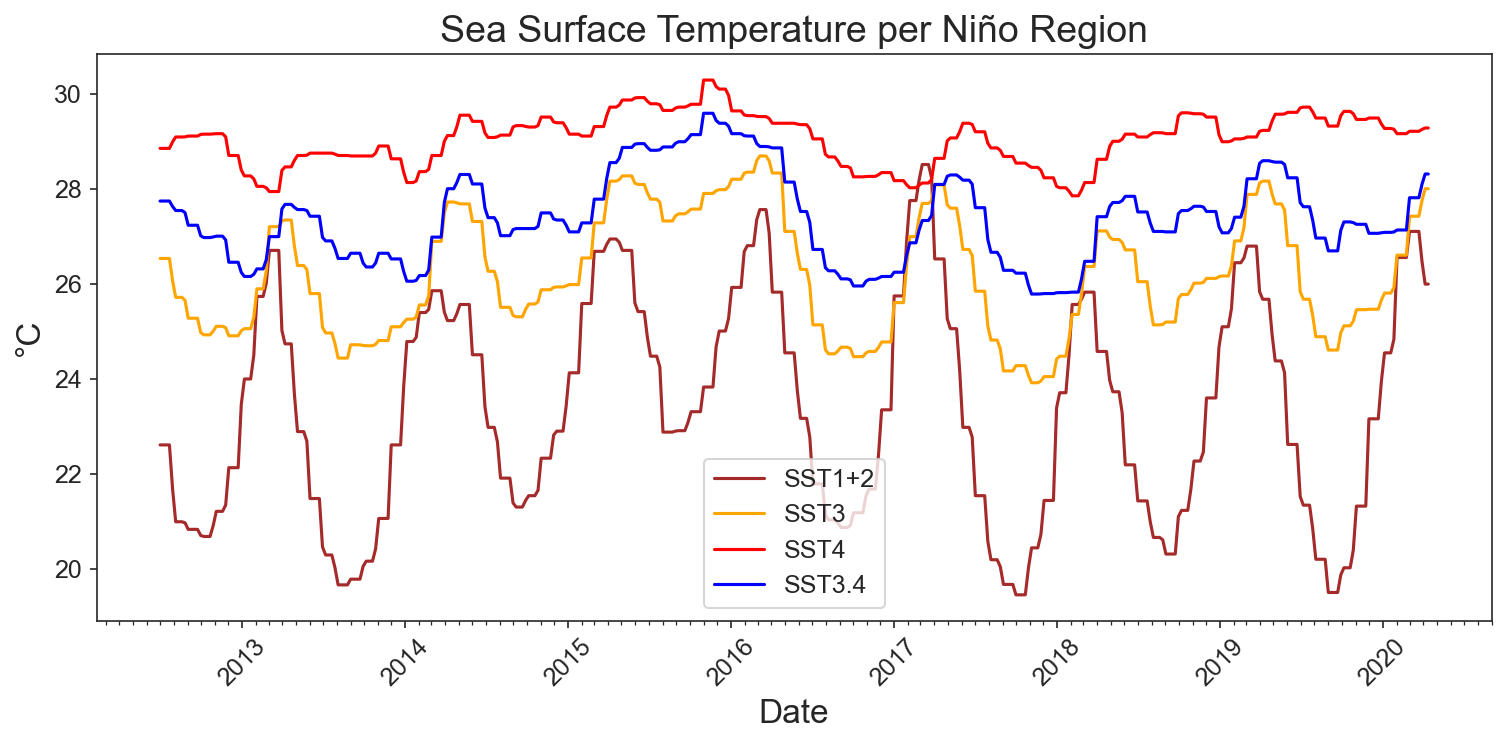

In [ ]:
x_array = [df.index]*4
y_array = [df["SST1+2"], df["SST3"], df["SST4"], df["SST3.4"]]
labels_array = ["SST1+2", "SST3", "SST4", "SST3.4"]
colors = ["brown","orange","red","blue"]
title = "Sea Surface Temperature per Niño Region"
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

# DENGUE PLOTS

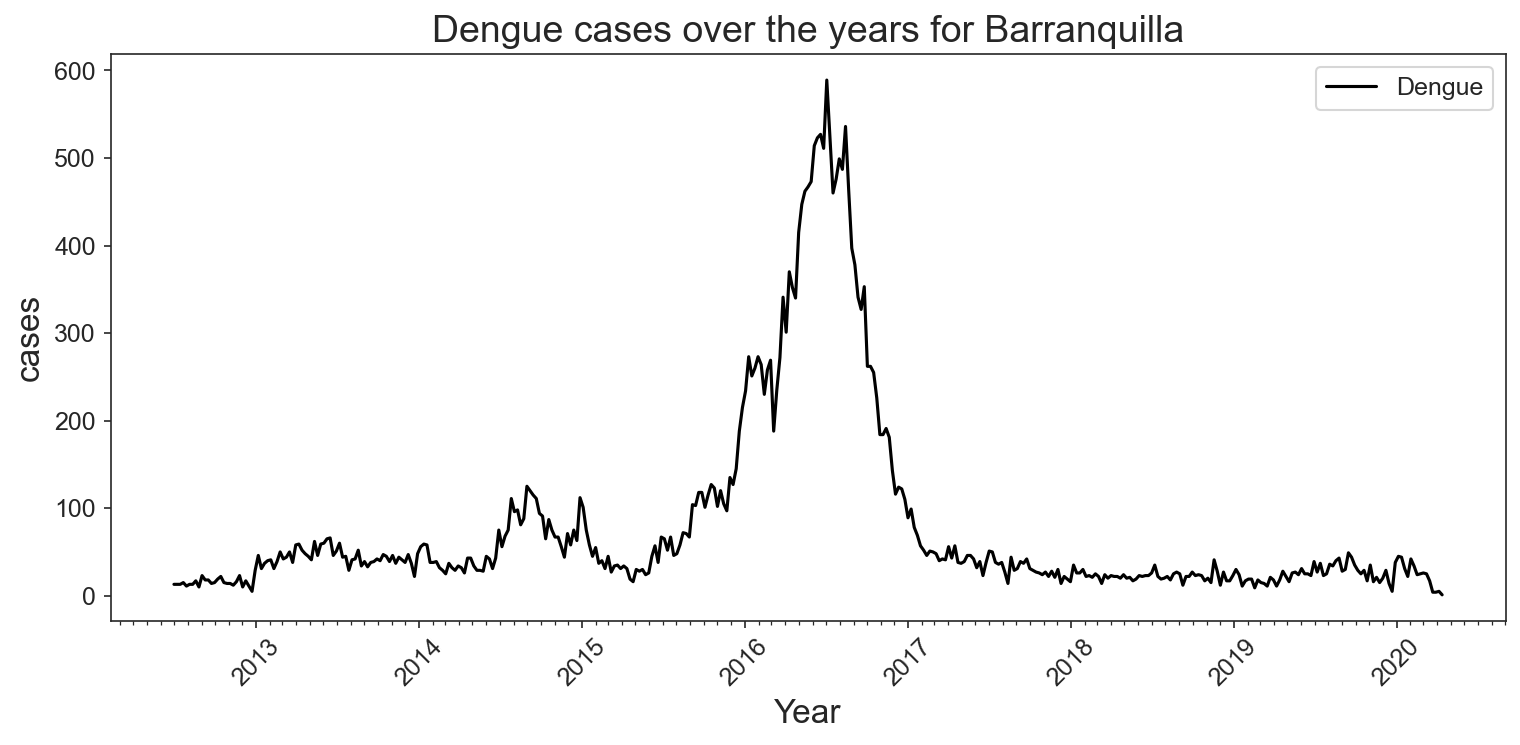

In [ ]:
x_array = [df.index]
y_array = [df["DENGUE"]]
labels_array = ["Dengue"]
title = "Dengue cases over the years for " + municipality
ylabel = "cases"
xlabel = "Year"
colors = ["black"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)


Text(0.5, 0, 'Month')

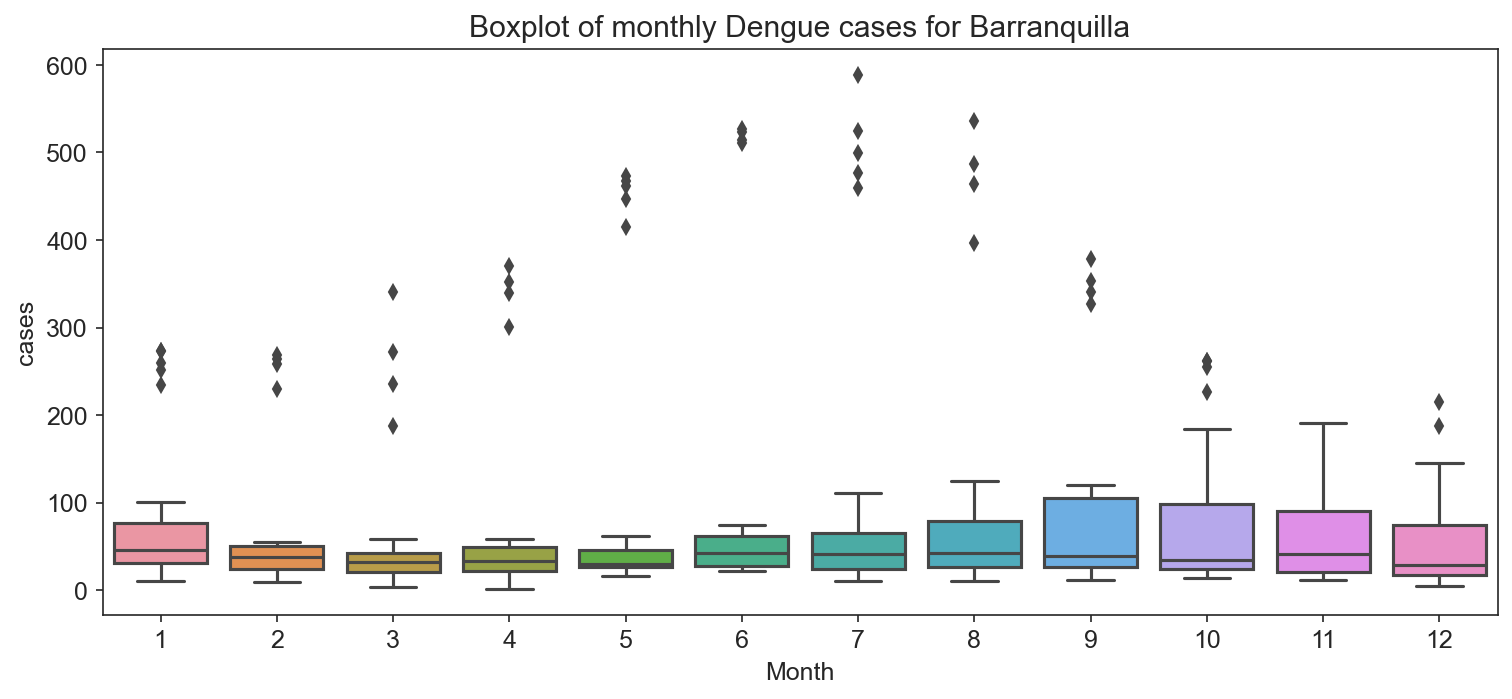

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["DENGUE"])
axes.set_title("Boxplot of monthly Dengue cases for " + municipality)
axes.set_ylabel("cases")
axes.set_xlabel("Month")

## BOXPLOTS FOR UNDERSTANDING THE BEHAVOIR OF EACH VARIABLE THROUGH TIME

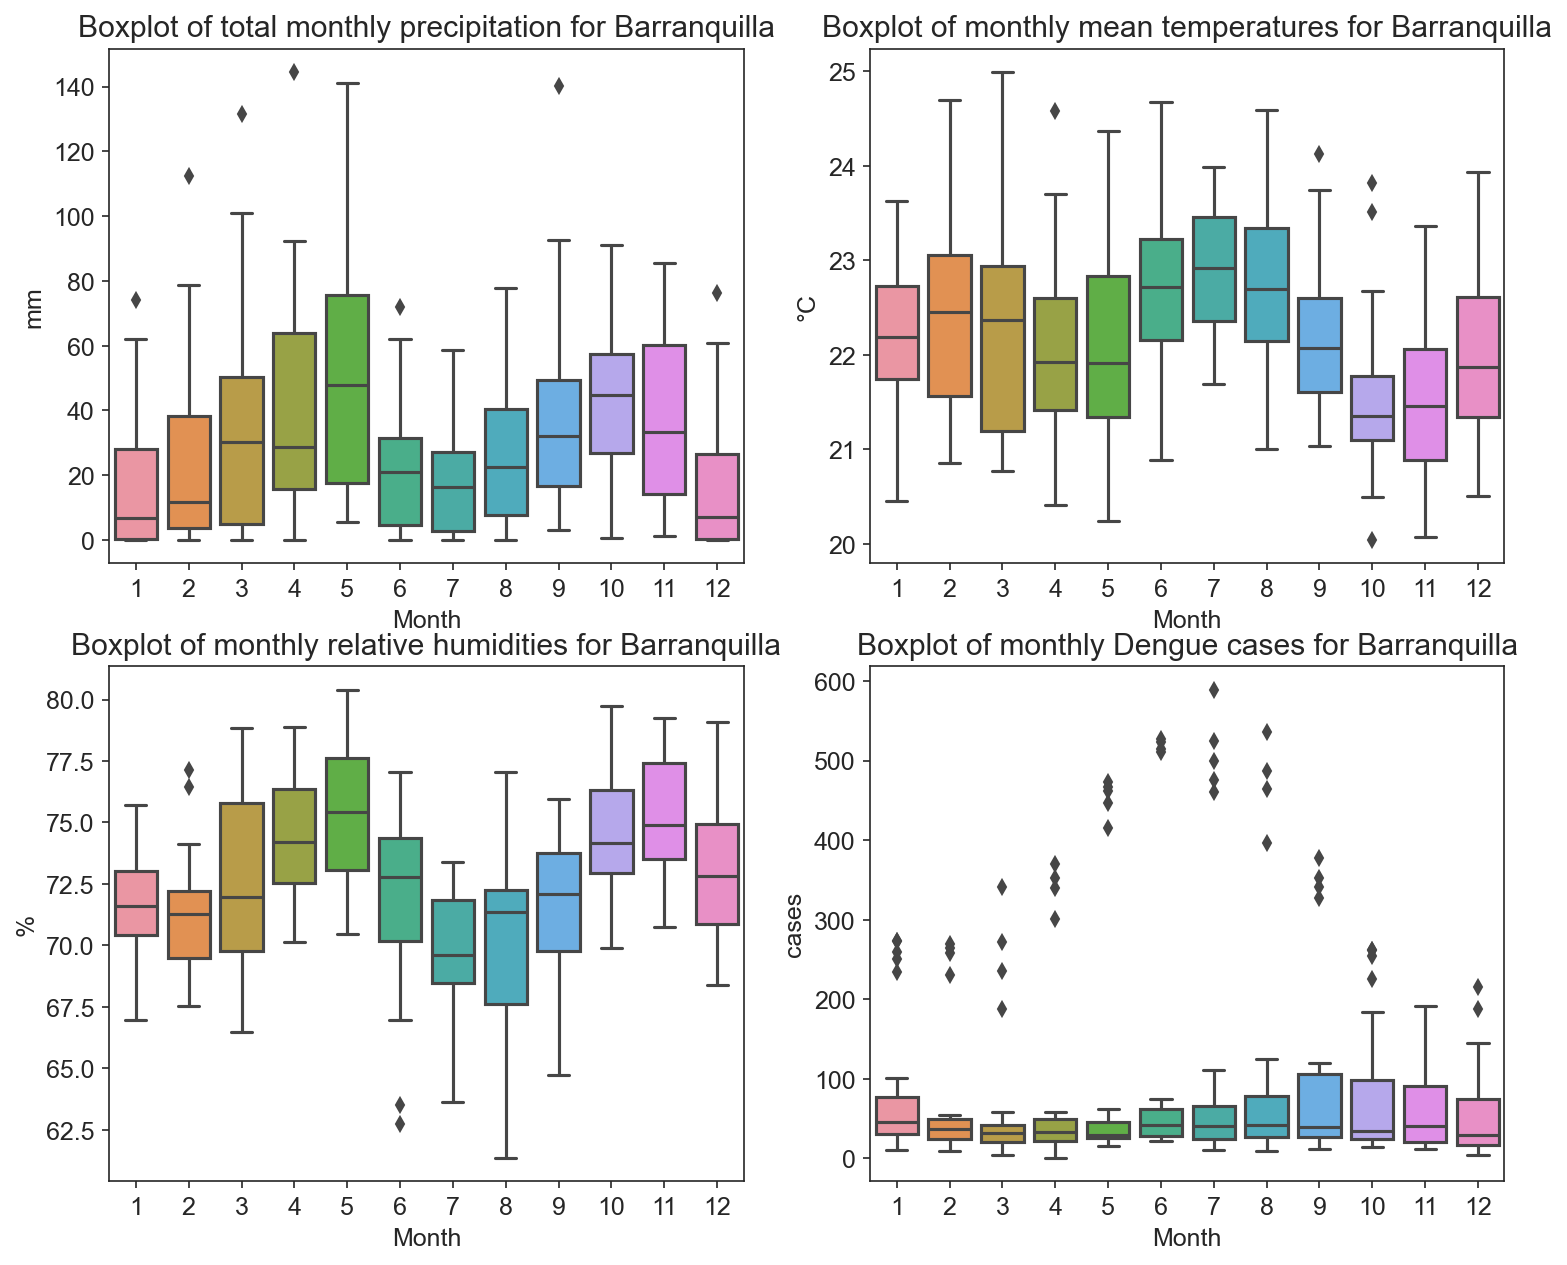

In [ ]:
cols = ['PRECIPITATION', 'TEMPERATURE_MEAN', 'REL_HUMIDITY_MEAN', 'DENGUE']
titles = ["Boxplot of total monthly precipitation for ", 
          "Boxplot of monthly mean temperatures for ",
          "Boxplot of monthly relative humidities for ",
          "Boxplot of monthly Dengue cases for "]
ylables = ['mm', '°C', '%', 'cases']

fig, ax = plt.subplots(figsize=(12, 10), dpi = 150)

for i, col in enumerate(cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=df.index.month, y=df[col]).set_title(titles[i] + municipality)
    plt.ylabel(ylables[i])
    plt.xlabel("Month")

# SIMPLE CORRELATION BETWEEN ALL VARIABLES

Some of the variables do not have to be in the correlation matrix. That's why they are removed from the beginning.

In [ ]:
df_for_corr = df.drop(columns=['COD_DPTO',"COD_MUNICIPIO","POBLACION", "DENGUE GRAVE","MORTALIDAD POR DENGUE"])

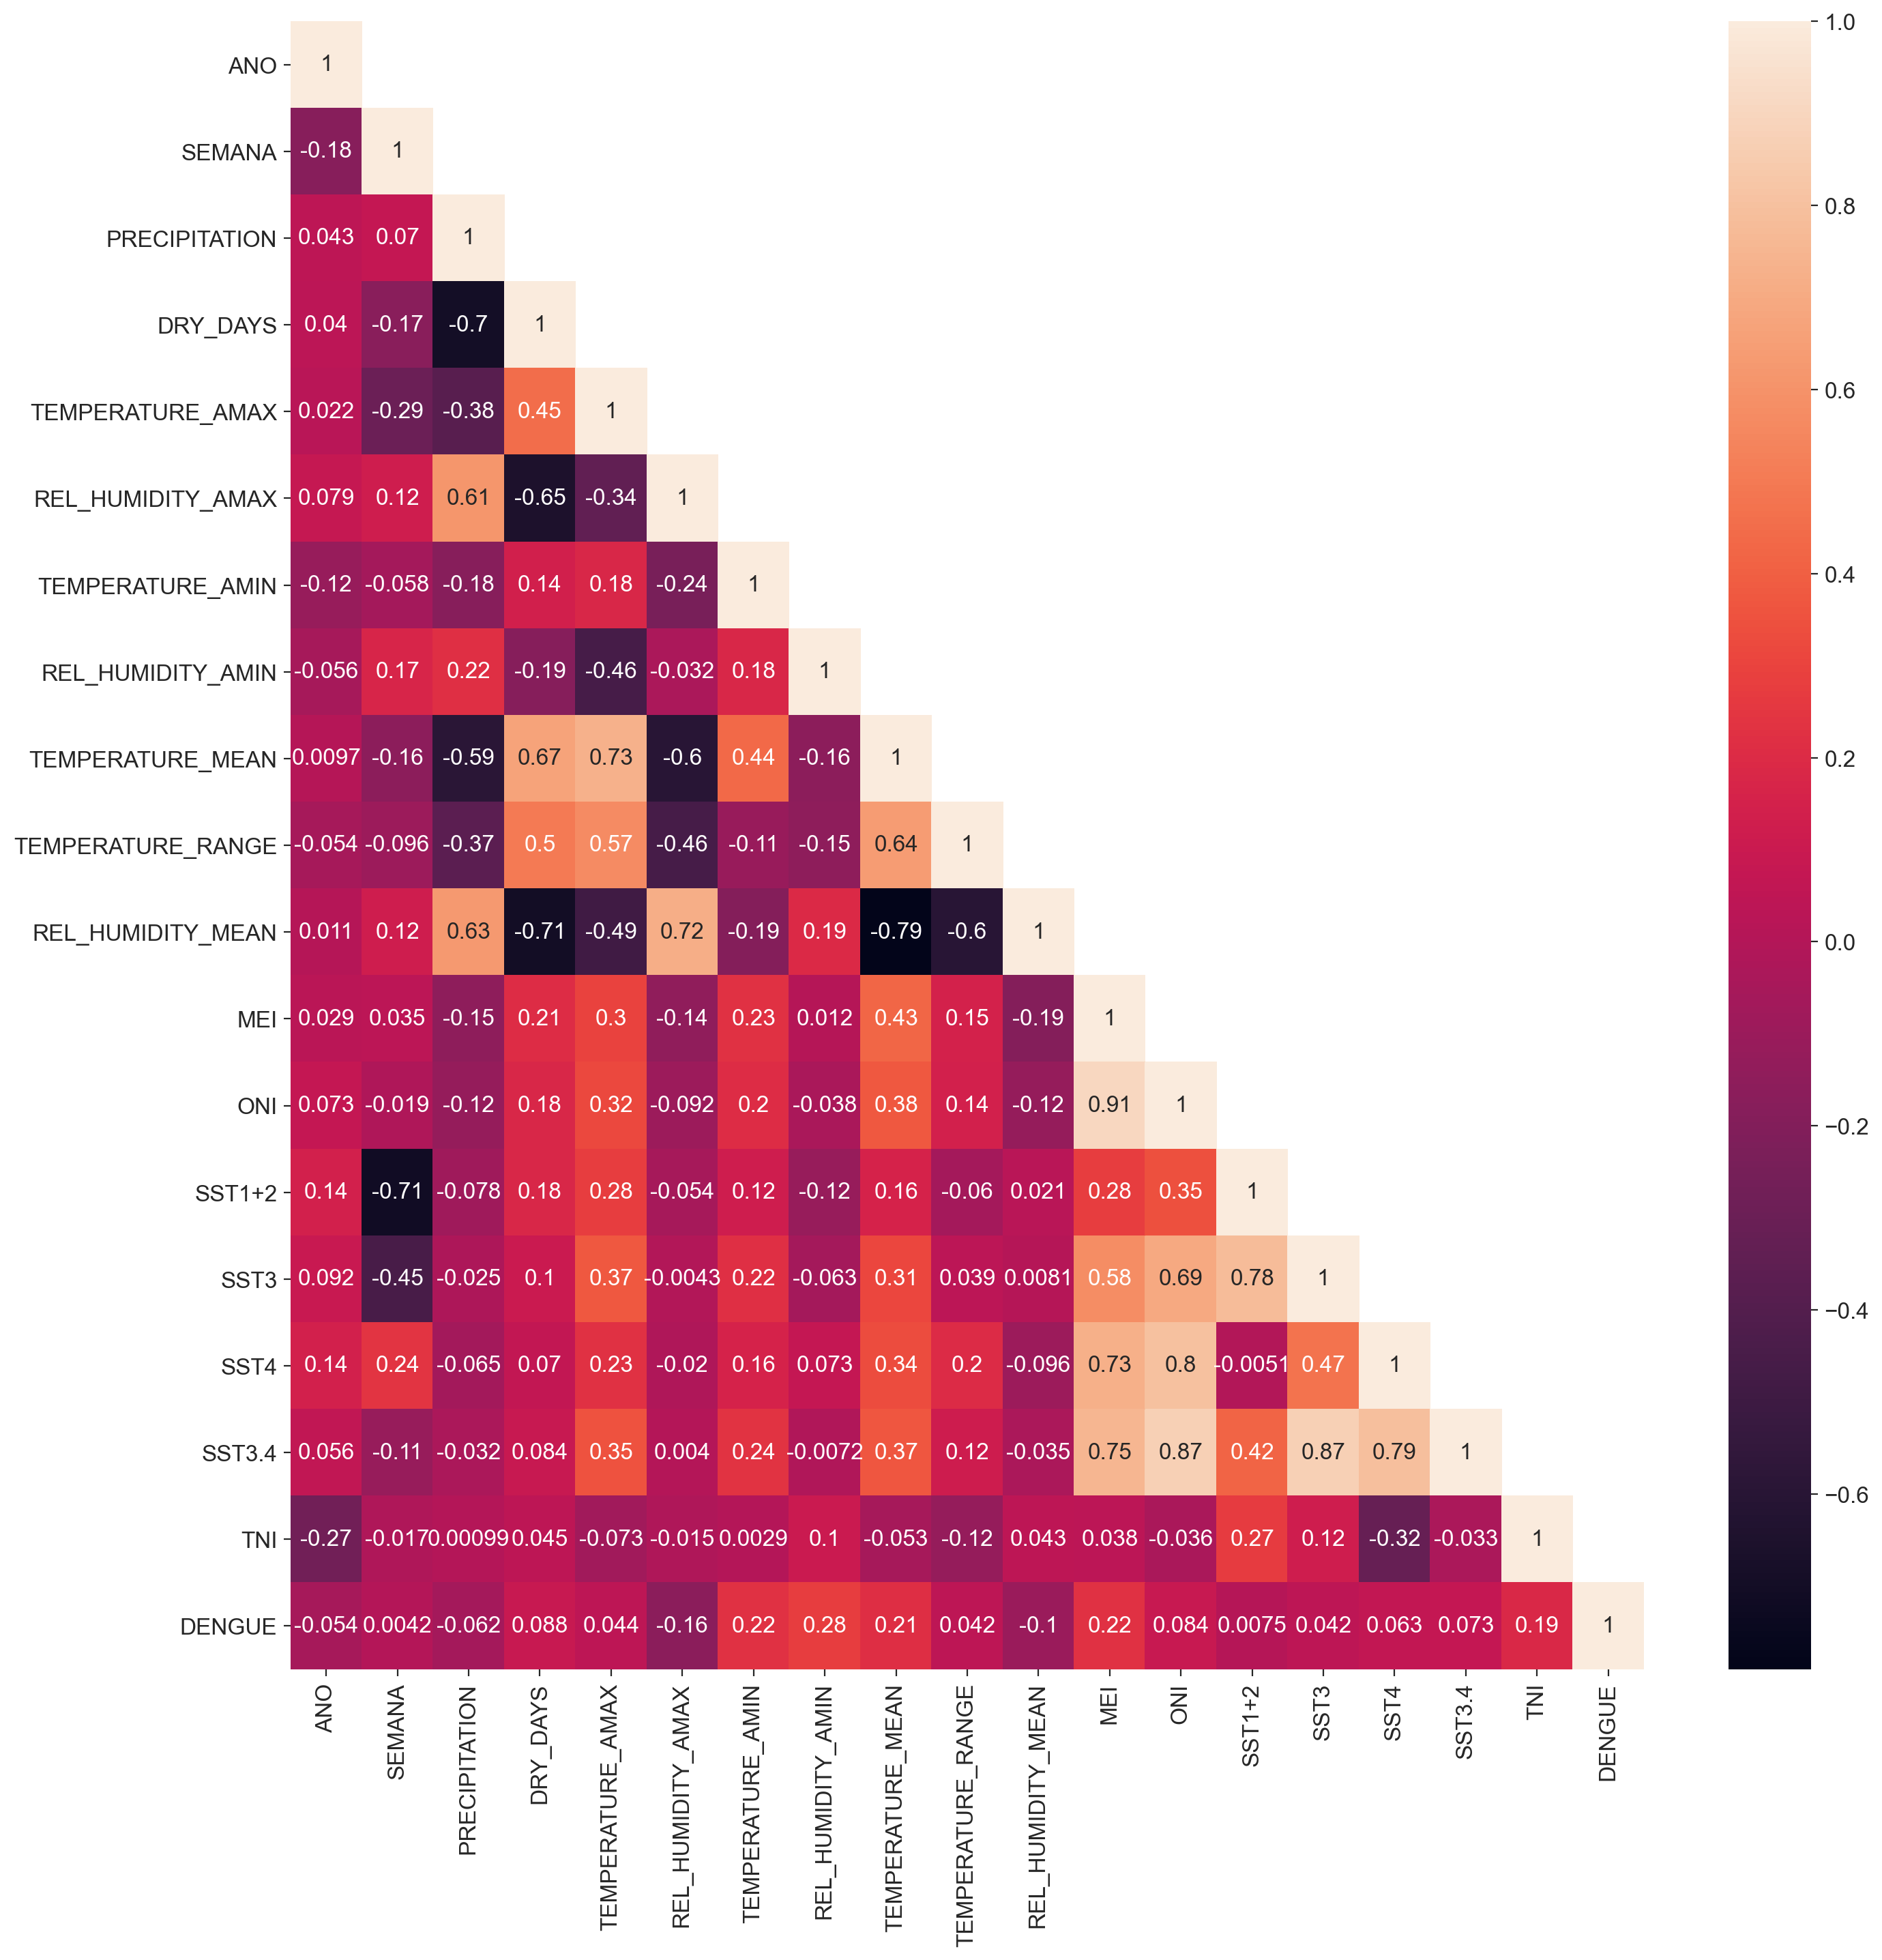

In [ ]:
fig, axs = plt.subplots(1,figsize=(16,16), dpi = 200)
corrMatrix = df_for_corr.corr()
corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sns.heatmap(corrMatrix, annot=True)
plt.show()

We see that some variables are quite correlated, so we could remove some of these. Interestingly, despite being the closest to Cali the SST for Region 1+2 has the weakest correlation with Dengue cases.

From the correlation matrix we see that variables such as: mean temperature, MEI, ONI, SST4, SST3.4 and TNI are the most correlated with the number of Dengue cases.

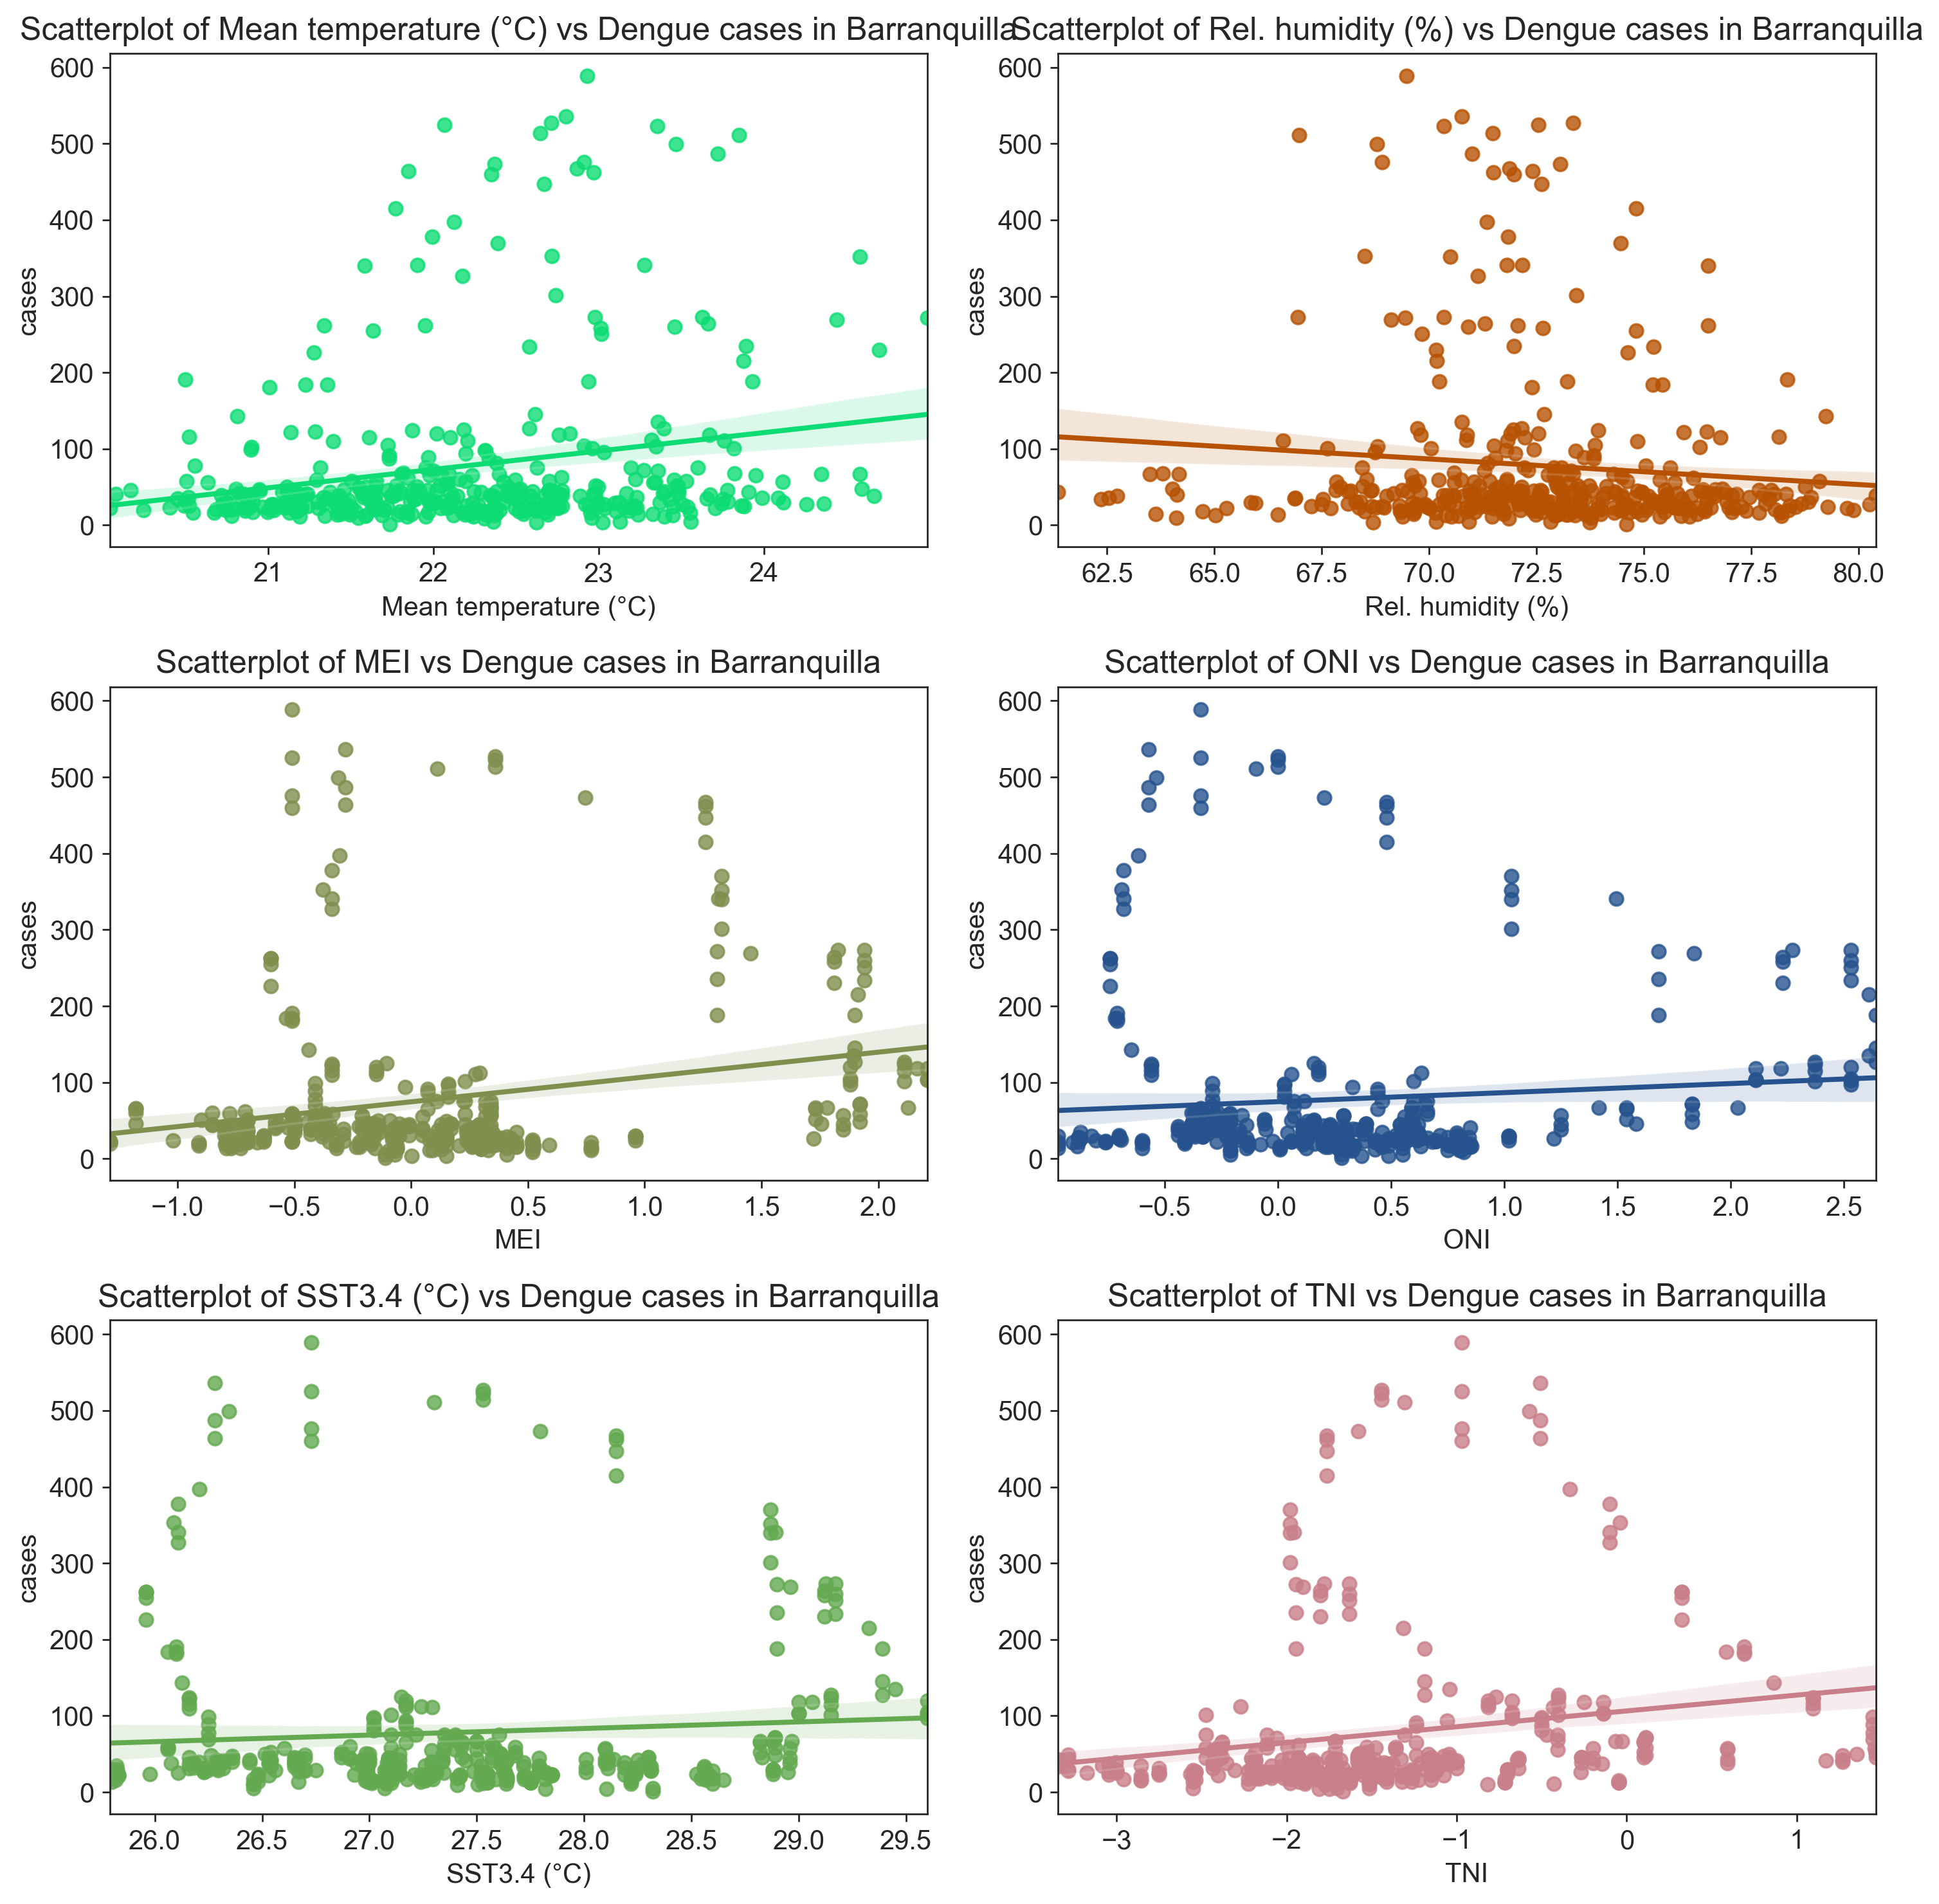

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(12,12), dpi = 250)
axes = axes.flatten()
vars_to_plot = ["TEMPERATURE_MEAN","REL_HUMIDITY_MEAN","MEI","ONI","SST3.4","TNI"]
xlabels  = ["Mean temperature (°C)","Rel. humidity (%)", "MEI", "ONI", "SST3.4 (°C)", "TNI"]
colors = list(mcolors.get_named_colors_mapping().keys())[99:105]
for i,var in enumerate(vars_to_plot):
    sns.regplot(x = df[var], y = df["DENGUE"], ax = axes[i], color = colors[i])
    axes[i].set_title("Scatterplot of "+xlabels[i]+" vs Dengue cases in " + municipality)
    axes[i].set_ylabel("cases")
    axes[i].set_xlabel(xlabels[i])
plt.tight_layout()

# CORRELATION OVER THE YEARS WITH DELAYS BETWEEN THE COVARIATES AND THE DENGUE CASES

In [ ]:
df["MES"] = df.index.month


In order to calculate the correlation of dengue with the lagged covariates a function was created. This function guarantees that a correlation is calculated for each meteorological variable for a specific number of lags against dengue (`lag_size`).  

This function lags the meteorological covariate, but does not lag the dengue variable, and according to this data it calculates the respective correlation over time.

In [ ]:
df

COD_DPTO  COD_MUNICIPIO  POBLACION   ANO  SEMANA  PRECIPITATION  \
FECHA                                                                         
2012-07-01         5           5001  2393011.0  2012      27           28.7   
2012-07-08         5           5001  2393011.0  2012      28           44.6   
2012-07-15         5           5001  2393011.0  2012      29            0.0   
2012-07-22         5           5001  2393011.0  2012      30            0.6   
2012-07-29         5           5001  2393011.0  2012      31           18.6   
...              ...            ...        ...   ...     ...            ...   
2020-03-15         5           5001  2569007.0  2020      12            9.6   
2020-03-22         5           5001  2569007.0  2020      13            0.0   
2020-03-29         5           5001  2569007.0  2020      14           32.2   
2020-04-05         5           5001  2569007.0  2020      15           16.3   
2020-04-12         5           5001  2569007.0  2020      16           31.9   

            DRY_DAYS  TEMPERATURE_AMAX  REL_HUMIDITY_AMAX  TEMPERATURE_AMIN  \
FECHA                                                                         
2012-07-01         2              30.1          91.000000              16.9   
2012-07-08         2              30.1          93.000000              16.8   
2012-07-15         7              30.3          86.290607              16.7   
2012-07-22         6              30.0          85.000000              17.6   
2012-07-29         2              29.8          92.000000              17.8   
...              ...               ...                ...               ...   
2020-03-15         4              30.6          91.000000              16.5   
2020-03-22         7              30.8          89.093813              15.7   
2020-03-29         2              30.2          95.000000              17.3   
2020-04-05         3              32.1          93.000000              18.0   
2020-04-12         2              29.3          95.000000              16.4   

            ...       ONI     SST1+2       SST3       SST4     SST3.4  \
FECHA       ...                                                         
2012-07-01  ...  0.270000  22.610000  26.540000  28.860000  27.750000   
2012-07-08  ...  0.270000  22.610000  26.540000  28.860000  27.750000   
2012-07-15  ...  0.270000  22.610000  26.540000  28.860000  27.750000   
2012-07-22  ...  0.270000  22.610000  26.540000  28.860000  27.750000   
2012-07-29  ...  0.304286  21.684286  26.071429  28.997143  27.635714   
...         ...       ...        ...        ...        ...        ...   
2020-03-15  ...  0.490000  27.110000  27.430000  29.220000  27.820000   
2020-03-22  ...  0.490000  27.110000  27.430000  29.220000  27.820000   
2020-03-29  ...  0.370000  26.475714  27.761429  29.260000  28.105714   
2020-04-05  ...  0.280000  26.000000  28.010000  29.290000  28.320000   
2020-04-12  ...  0.280000  26.000000  28.010000  29.290000  28.320000   

                 TNI  DENGUE  DENGUE GRAVE  MORTALIDAD POR DENGUE  MES  
FECHA                                                                   
2012-07-01 -0.046000      13             0                      0    7  
2012-07-08 -0.046000      13             0                      0    7  
2012-07-15 -0.046000      13             0                      0    7  
2012-07-22 -0.046000      15             0                      0    7  
2012-07-29 -0.430000      11             1                      0    7  
...              ...     ...           ...                    ...  ...  
2020-03-15 -1.811000      17             0                      0    3  
2020-03-22 -1.811000       4             1                      0    3  
2020-03-29 -1.749486       4             0                      0    3  
2020-04-05 -1.703386       5             0                      0    4  
2020-04-12 -1.671194       1             0                      0    4  

[407 rows x 25 columns]

In [ ]:
promedios_mensuales = df.groupby(df.MES).mean().reset_index()
desv_esta_mensuales = df.groupby(df.MES).std().reset_index()

#promedios_mensuales = promedios_mensuales.rename(columns={'index': 'SEMANA'})
#desv_esta_mensuales = desv_esta_mensuales.rename(columns={'index': 'SEMANA'})

promedios_mensuales = promedios_mensuales[df.columns]
desv_esta_mensuales = desv_esta_mensuales[df.columns]

In [ ]:
df_norm = df.copy()

prom = promedios_mensuales.values[:,0:]
std = desv_esta_mensuales.values[:,0:]
for i in range(len(df)):
    mes = int(df_norm.iloc[i,:].MES - 1)
    for j,col in  enumerate(df_norm.columns[:-4]):
        df_norm.iloc[i,j] = (df_norm.iloc[i,j]-prom[mes,j])/std[mes,j]
#df_norm = df.copy()

In [ ]:
def lagged_corr(df, weeks, var, window):
    return df[str(var)].shift(periods=weeks).iloc[weeks:].corr(df['DENGUE'].iloc[weeks:], min_periods=window)

                                                        
cols = ['PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE']

df_corr_melt = pd.melt(df_norm.reset_index().reset_index(), id_vars='index', value_vars=cols)

The variables are kept to 24 lags, because after this period of time, usually the behavior starts repeating itself. This filter allows us to reduce the noise in the data.

In [ ]:
df_corr_melt

index       variable      value
0         0  PRECIPITATION   0.718014
1         1  PRECIPITATION   1.741369
2         2  PRECIPITATION  -1.129173
3         3  PRECIPITATION  -1.090556
4         4  PRECIPITATION   0.067959
...     ...            ...        ...
6914    402         DENGUE  17.000000
6915    403         DENGUE   4.000000
6916    404         DENGUE   4.000000
6917    405         DENGUE   5.000000
6918    406         DENGUE   1.000000

[6919 rows x 3 columns]

In [ ]:
df_corr_melt.rename(columns={'index':'lag_size'}, inplace=True)
df_corr_melt = df_corr_melt[(df_corr_melt["lag_size"]<=24)&(df_corr_melt["lag_size"]>2)]
df_corr_melt

lag_size       variable      value
3            3  PRECIPITATION  -1.090556
4            4  PRECIPITATION   0.067959
5            5  PRECIPITATION  -0.350269
6            6  PRECIPITATION   0.726371
7            7  PRECIPITATION   1.033308
...        ...            ...        ...
6532        20         DENGUE  16.000000
6533        21         DENGUE  23.000000
6534        22         DENGUE  10.000000
6535        23         DENGUE  17.000000
6536        24         DENGUE  11.000000

[374 rows x 3 columns]

In [ ]:
df_corr_melt['corr'] = df_corr_melt.apply(lambda x: lagged_corr(df_norm, x.lag_size,
                                                          x.variable, 200), axis=1)

In [ ]:
df_corr_pivot = df_corr_melt.pivot_table(columns='lag_size', index='variable', values='corr')
row_max = np.abs(df_corr_pivot).idxmax(axis=1)
columns = row_max.index

In [ ]:
df_corr_pivot

lag_size                 3         4         5         6         7         8   \
variable                                                                        
DENGUE             0.968917  0.956255  0.940903  0.925104  0.904398  0.882272   
DRY_DAYS           0.105835  0.112139  0.117606  0.128274  0.146083  0.135880   
MEI                0.326802  0.354702  0.385267  0.415531  0.446300  0.475300   
ONI                0.146203  0.175849  0.207694  0.240601  0.273656  0.305844   
PRECIPITATION     -0.079680 -0.087161 -0.091010 -0.103706 -0.114070 -0.108021   
REL_HUMIDITY_AMAX -0.193346 -0.193427 -0.195959 -0.204133 -0.203756 -0.206035   
REL_HUMIDITY_AMIN  0.197529  0.198702  0.179972  0.167026  0.158451  0.154979   
REL_HUMIDITY_MEAN -0.103753 -0.114446 -0.116448 -0.138907 -0.151009 -0.150263   
SST1+2             0.210088  0.225264  0.234249  0.250448  0.265833  0.283808   
SST3               0.138763  0.165292  0.190523  0.221955  0.252937  0.284098   
SST3.4             0.088488  0.119548  0.150759  0.186125  0.220140  0.253154   
SST4               0.063841  0.091412  0.118267  0.145686  0.172743  0.198967   
TEMPERATURE_AMAX   0.066378  0.069320  0.083491  0.116690  0.129506  0.138731   
TEMPERATURE_AMIN   0.246171  0.254273  0.258901  0.266873  0.288692  0.301493   
TEMPERATURE_MEAN   0.219613  0.233562  0.243507  0.269927  0.290676  0.296098   
TEMPERATURE_RANGE -0.008513 -0.001573  0.005983  0.023992  0.029808  0.025690   
TNI                0.142110  0.129641  0.118987  0.108202  0.098453  0.089366   

lag_size                 9         10        11        12  ...        15  \
variable                                                   ...             
DENGUE             0.859618  0.834917  0.810440  0.787514  ...  0.705116   
DRY_DAYS           0.152138  0.154704  0.161284  0.169334  ...  0.202760   
MEI                0.502553  0.529666  0.556753  0.582632  ...  0.648989   
ONI                0.339174  0.372994  0.406193  0.437972  ...  0.525557   
PRECIPITATION     -0.121618 -0.121036 -0.128941 -0.136948  ... -0.152570   
REL_HUMIDITY_AMAX -0.213200 -0.210076 -0.210053 -0.213744  ... -0.201413   
REL_HUMIDITY_AMIN  0.149946  0.148279  0.139330  0.121260  ...  0.059755   
REL_HUMIDITY_MEAN -0.155841 -0.156917 -0.164924 -0.176411  ... -0.185052   
SST1+2             0.301237  0.316571  0.330504  0.345292  ...  0.394752   
SST3               0.315769  0.348452  0.379029  0.407884  ...  0.497376   
SST3.4             0.288584  0.324753  0.359006  0.391712  ...  0.489433   
SST4               0.227853  0.255633  0.281299  0.306155  ...  0.380206   
TEMPERATURE_AMAX   0.160673  0.157746  0.181104  0.206710  ...  0.262475   
TEMPERATURE_AMIN   0.309281  0.308385  0.320120  0.322839  ...  0.321877   
TEMPERATURE_MEAN   0.313359  0.318363  0.333505  0.352252  ...  0.386848   
TEMPERATURE_RANGE  0.035371  0.040379  0.047250  0.062679  ...  0.084760   
TNI                0.082158  0.074851  0.067792  0.061636  ...  0.055801   

lag_size                 16        17        18        19        20        21  \
variable                                                                        
DENGUE             0.673889  0.642702  0.616924  0.587737  0.556240  0.524877   
DRY_DAYS           0.202210  0.205967  0.214704  0.216955  0.212959  0.210081   
MEI                0.668306  0.684714  0.700219  0.714796  0.729110  0.741118   
ONI                0.552634  0.577397  0.599003  0.619288  0.638513  0.656986   
PRECIPITATION     -0.160756 -0.158392 -0.171193 -0.171091 -0.166232 -0.163968   
REL_HUMIDITY_AMAX -0.206821 -0.213962 -0.201697 -0.198260 -0.189775 -0.180041   
REL_HUMIDITY_AMIN  0.060434  0.040319  0.024388  0.016134  0.007552 -0.010338   
REL_HUMIDITY_MEAN -0.185187 -0.190708 -0.192432 -0.200281 -0.199337 -0.198364   
SST1+2             0.407948  0.422708  0.439719  0.452714  0.462725  0.477234   
SST3               0.522174  0.547285  0.571616  0.590688  0.608035  0.626609   
SST3.4             0.518363  0.546075  0.57

In [ ]:
df_corr_melt.variable.unique()

array(['PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX',
       'REL_HUMIDITY_AMAX', 'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN',
       'TEMPERATURE_MEAN', 'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN',
       'MEI', 'ONI', 'SST1+2', 'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE'],
      dtype=object)

In [ ]:
df_corr_melt_sub = df_corr_melt[df_corr_melt['variable'].isin(('MEI', 'ONI', 'SST1+2', 'SST3', 'SST4', 'SST3.4', 'TNI'))]
# df_corr_melt_sub

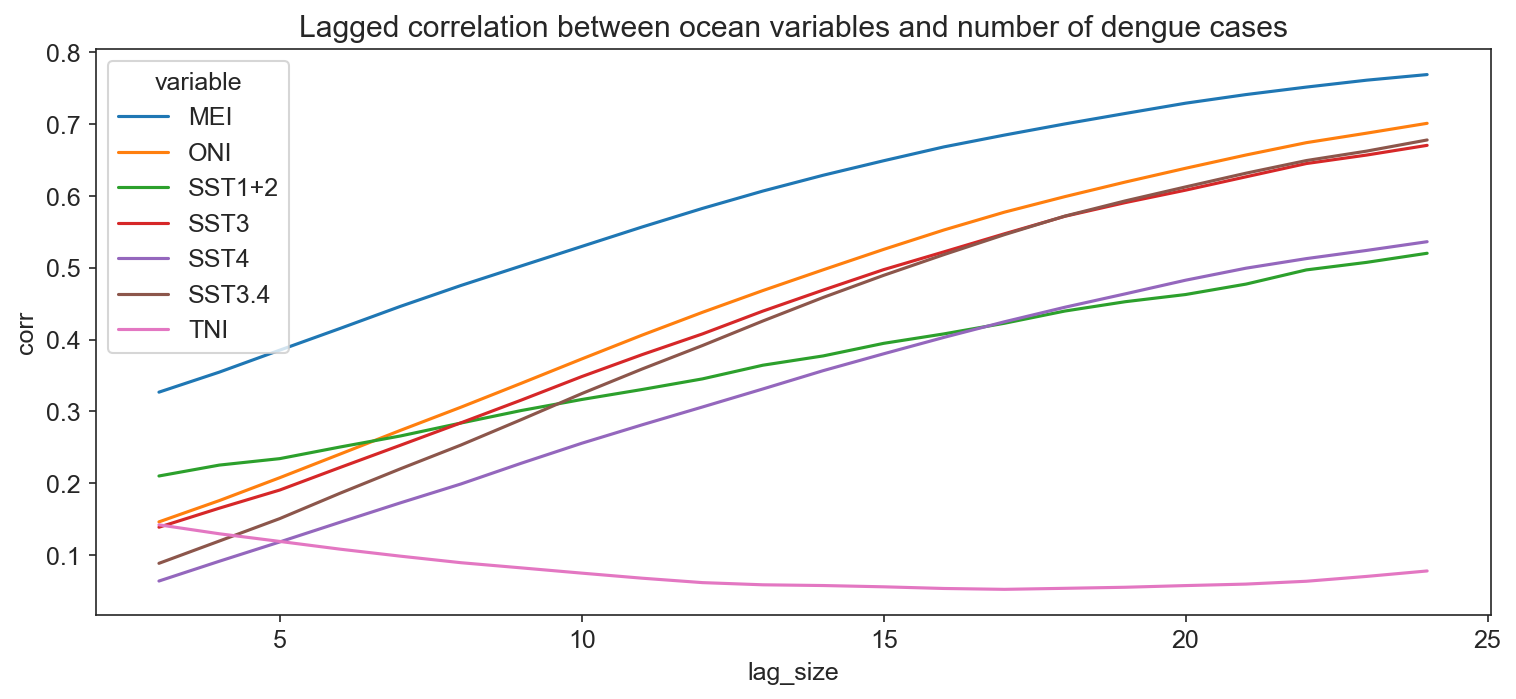

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub, hue = 'variable').set_title('Lagged correlation between ocean variables and number of dengue cases')

In [ ]:
df_corr_melt_sub3 = df_corr_melt[df_corr_melt['variable'] == 'DENGUE']
# df_corr_melt_sub3

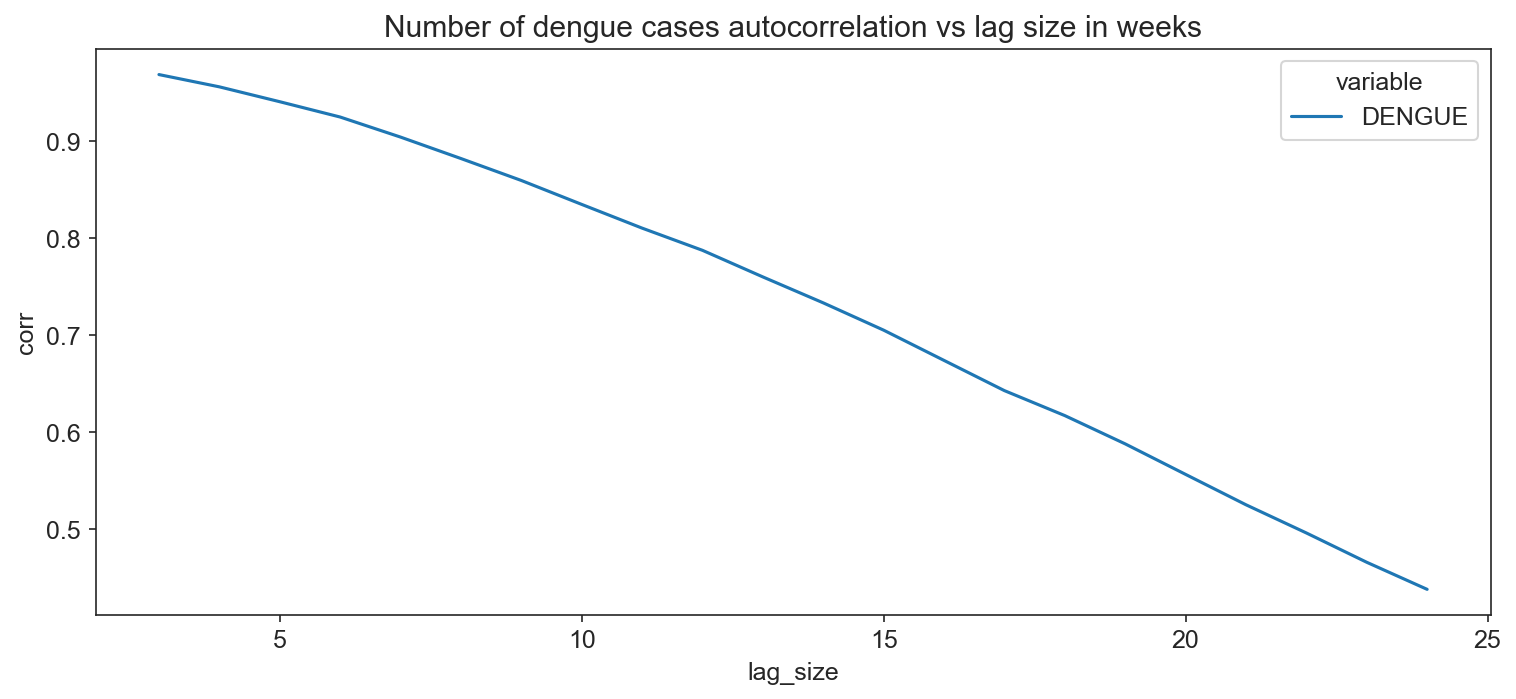

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub3, hue = 'variable').set_title('Number of dengue cases autocorrelation vs lag size in weeks')

In [ ]:
df_corr_melt_sub2 = df_corr_melt[df_corr_melt['variable'].isin(('TEMPERATURE_MEAN', 'REL_HUMIDITY_MEAN', 'PRECIPITATION'))]
# df_corr_melt_sub2

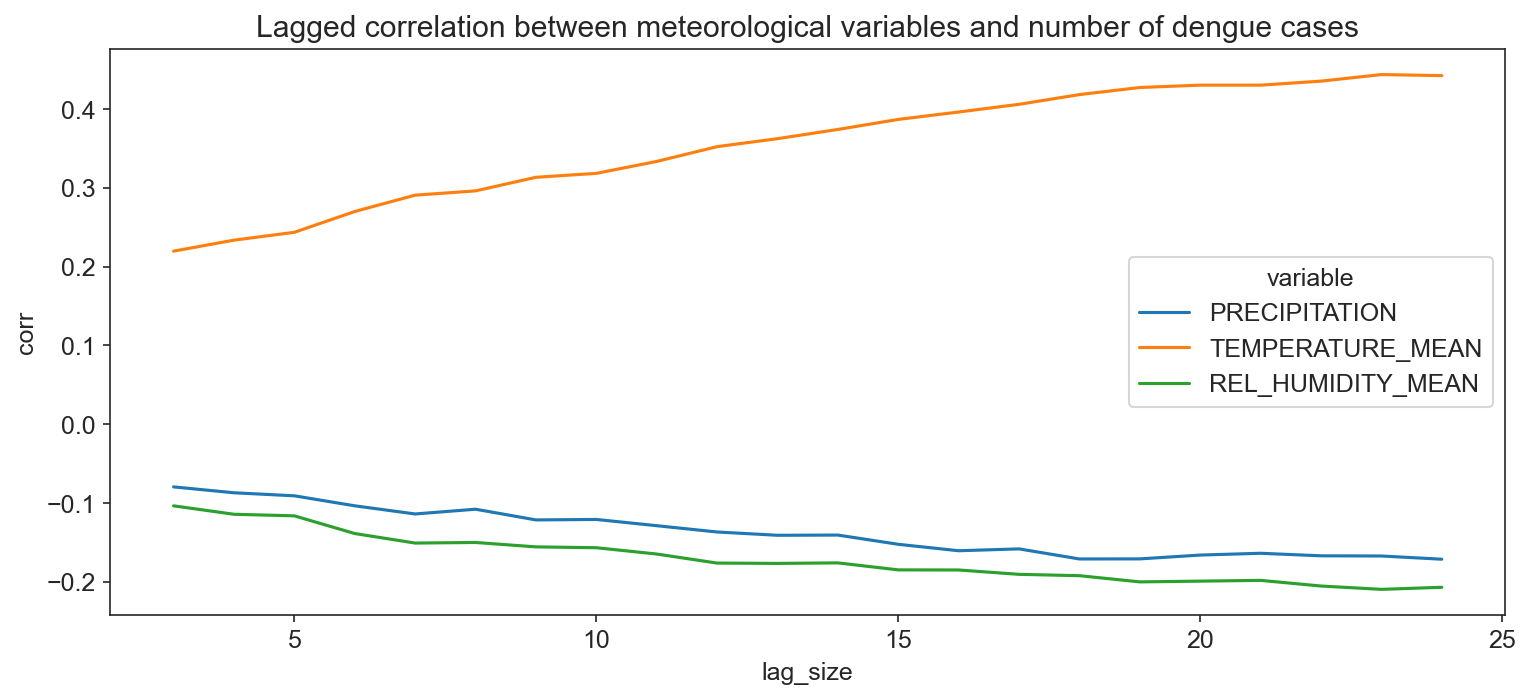

In [ ]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub2, hue = 'variable').set_title('Lagged correlation between meteorological variables and number of dengue cases')

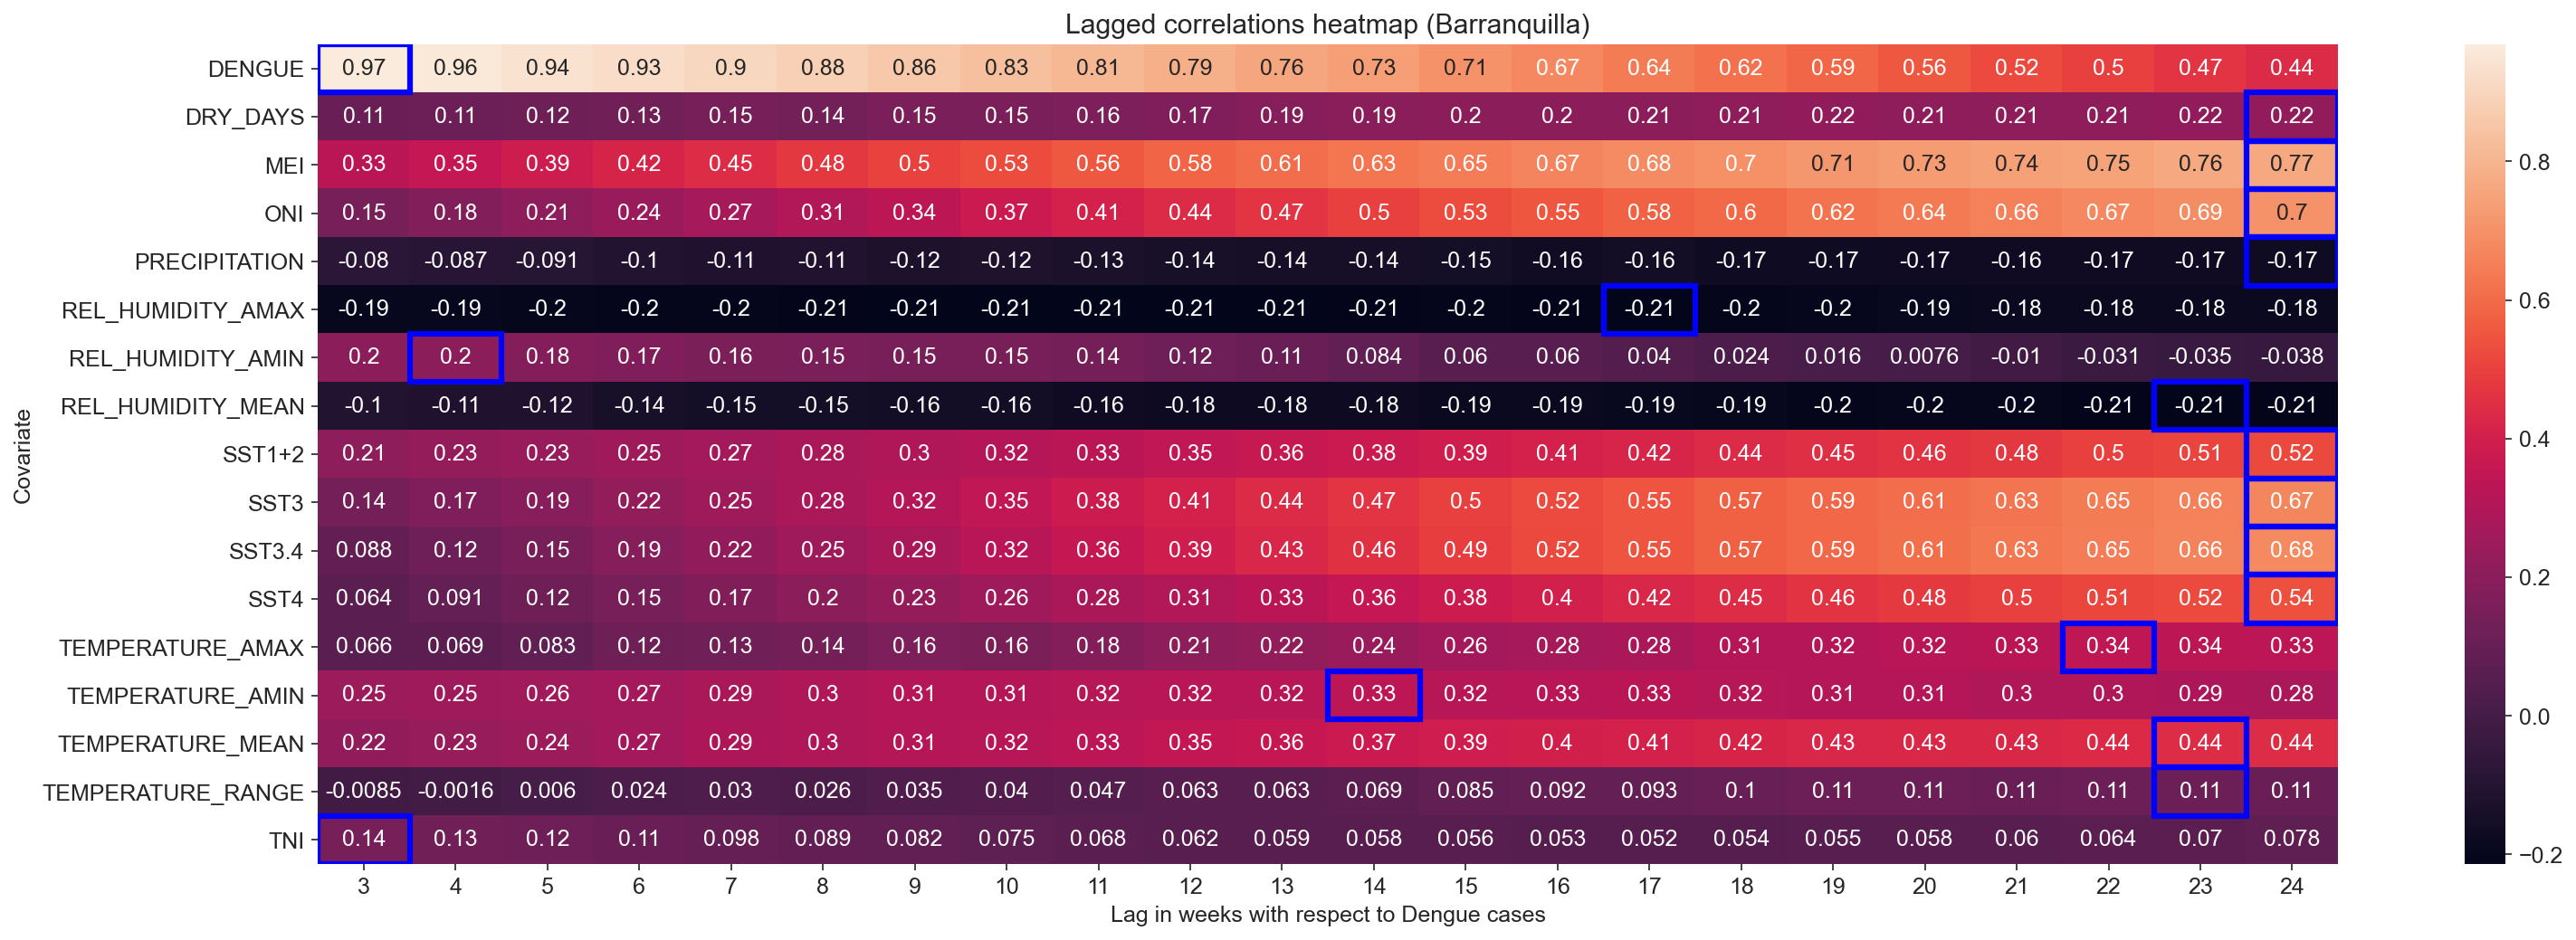

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(24,8), dpi = 150)
sns.heatmap(df_corr_pivot, annot = True, ax = ax)
ax.set_xlabel("Lag in weeks with respect to Dengue cases")
ax.set_title("Lagged correlations heatmap ({})".format(municipality))
ax.set_ylabel("Covariate");
for row, index in enumerate(columns):
    position = df_corr_pivot.columns.get_loc(row_max[index])
    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='blue', lw=3))


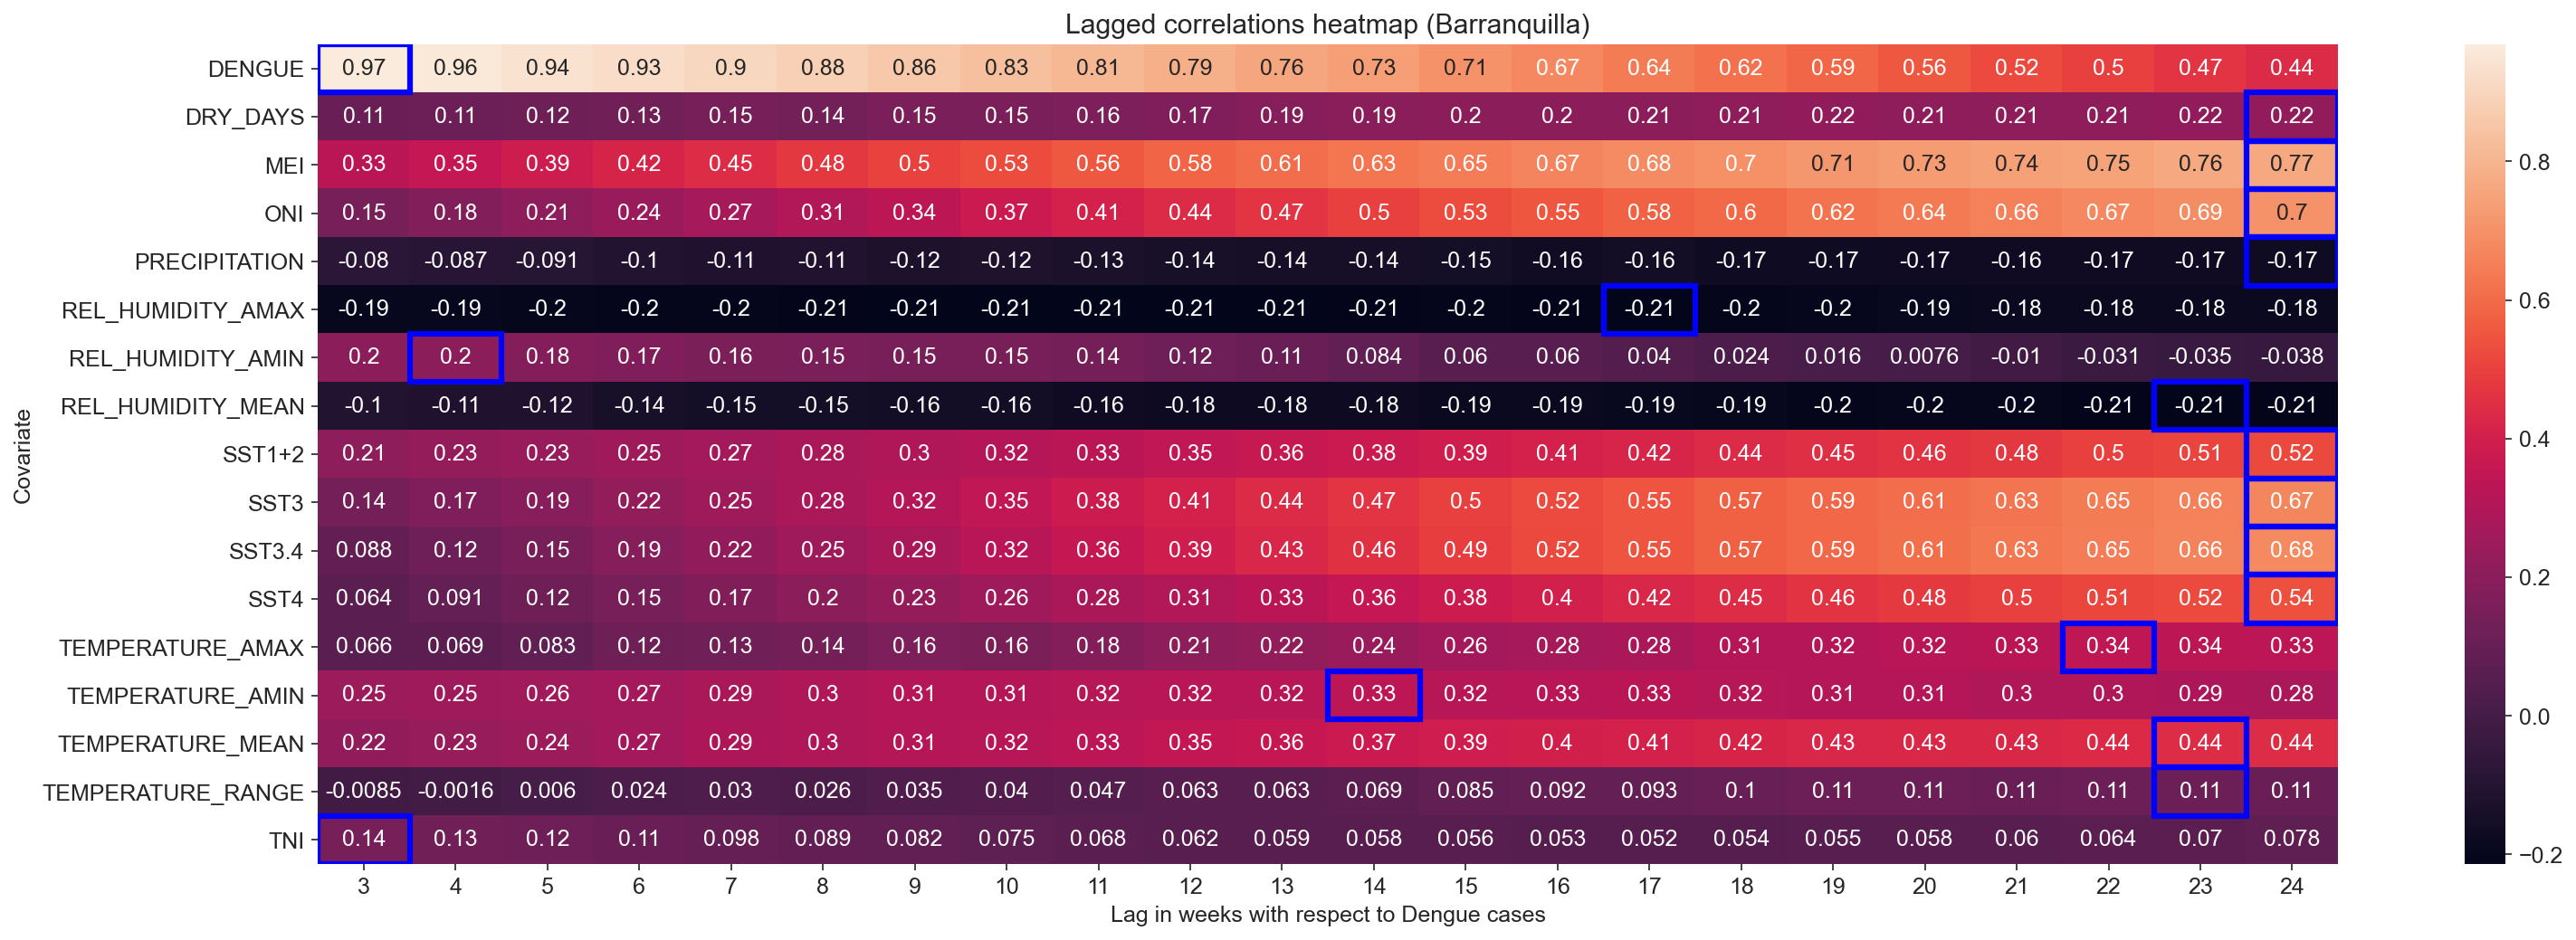

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(24,8), dpi = 150)
sns.heatmap(df_corr_pivot, annot = True, ax = ax)
ax.set_xlabel("Lag in weeks with respect to Dengue cases")
ax.set_title("Lagged correlations heatmap ({})".format(municipality))
ax.set_ylabel("Covariate");
for row, index in enumerate(columns):
    position = df_corr_pivot.columns.get_loc(row_max[index])
    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='blue', lw=3))


The following function is done with the purpose of calculating the correlation between the meteorological variables and the lagged dengue, this variable is lagged up to 17 times and the `phases_confirmed` dataframe shows the result of this calculations.

In [ ]:
def obtener_conjunto_desfasado(datos,meses_desfase):
    dat_desfase = datos.copy().reset_index(drop=True)
    for i in range(len(dat_desfase)-meses_desfase):
        dat_desfase.loc[i,"DENGUE_UNPHASED"] = dat_desfase.loc[i+meses_desfase,"DENGUE"]
    quitar_filas = list(range(len(dat_desfase)-meses_desfase,len(dat_desfase)))
    dat_desfase= dat_desfase.drop(dat_desfase.index[quitar_filas])
    return dat_desfase

In [ ]:
df_for_corr_2 = df_for_corr[cols]
phases = [obtener_conjunto_desfasado(df_for_corr_2, i).corr(method='pearson').iloc[:,-1:] for i in range(17)]
phases_confirmed = pd.concat(phases, axis = 1)

In [ ]:
phases_confirmed